# TCC

## 1 - Library Imports

In [656]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.reset_option('display.max_rows')
plt.style.use('seaborn-v0_8')


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.cluster import KMeans
from itertools import combinations

from scipy.spatial.distance import euclidean
from imblearn.over_sampling import SMOTE



## 2 - Data Cleaning

In [657]:

# Substitua 'caminho_para_seu_arquivo.csv' pelo caminho do seu arquivo CSV
file = 'exoplanets_confirmed.csv'
df = pd.read_csv(file)

df.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\3167806344.py:3: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_refname,disc_pubdate,disc_locale,disc_facility,disc_telescope,disc_instrument,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_masse,pl_masseerr1,pl_masseerr2,pl_masselim,pl_massj,pl_massjerr1,pl_massjerr2,pl_massjlim,pl_msinie,pl_msinieerr1,pl_msinieerr2,pl_msinielim,pl_msinij,pl_msinijerr1,pl_msinijerr2,pl_msinijlim,pl_cmasse,pl_cmasseerr1,pl_cmasseerr2,pl_cmasselim,pl_cmassj,pl_cmassjerr1,pl_cmassjerr2,pl_cmassjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tsystemref,ttv_flag,pl_imppar,pl_impparerr1,pl_impparerr2,pl_impparlim,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandur,pl_trandurerr1,pl_trandurerr2,pl_trandurlim,pl_ratdor,pl_ratdorerr1,pl_ratdorerr2,pl_ratdorlim,pl_ratror,pl_ratrorerr1,pl_ratrorerr2,pl_ratrorlim,pl_occdep,pl_occdeperr1,pl_occdeperr2,pl_occdeplim,pl_orbtper,pl_orbtpererr1,pl_orbtpererr2,pl_orbtperlim,pl_orblper,pl_orblpererr1,pl_orblpererr2,pl_orblperlim,pl_rvamp,pl_rvamperr1,pl_rvamperr2,pl_rvamplim,pl_projobliq,pl_projobliqerr1,pl_projobliqerr2,pl_projobliqlim,pl_trueobliq,pl_trueobliqerr1,pl_trueobliqerr2,pl_trueobliqlim,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_age,st_ageerr1,st_ageerr2,st_agelim,st_dens,st_denserr1,st_denserr2,st_denslim,st_vsin,st_vsinerr1,st_vsinerr2,st_vsinlim,st_rotp,st_rotperr1,st_rotperr2,st_rotplim,st_radv,st_radverr1,st_radverr2,st_radvlim,sy_refname,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmerr1,sy_pmerr2,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmdec,sy_pmdecerr1,sy_pmdecerr2,sy_dist,sy_disterr1,sy_disterr2,sy_plx,sy_plxerr1,sy_plxerr2,sy_bmag,sy_bmagerr1,sy_bmagerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_jmag,sy_jmagerr1,sy_jmagerr2,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_umag,sy_umagerr1,sy_umagerr2,sy_gmag,sy_gmagerr1,sy_gmagerr2,sy_rmag,sy_rmagerr1,sy_rmagerr2,sy_imag,sy_imagerr1,sy_imagerr2,sy_zmag,sy_zmagerr1,sy_zmagerr2,sy_w1mag,sy_w1magerr1,sy_w1magerr2,sy_w2mag,sy_w2magerr1,sy_w2magerr2,sy_w3mag,sy_w3magerr1,sy_w3magerr2,sy_w4mag,sy_w4magerr1,sy_w4magerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,sy_icmag,sy_icmagerr1,sy_icmagerr2,sy_tmag,sy_tmagerr1,sy_tmagerr2,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,1,0,0,Radial Velocity,2007,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,2008-01,Ground,Xinglong Station,2.16 m Telescope,Coude Echelle Spectrograph,1,0,0,0,0,0,0,0,0,0,Published Confirmed,0,<a refstr=KUNITOMO_ET_AL__2011 href=https://ui...,NaN,NaN,NaN,NaN,1.210,0.06,-0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5434.70000,540.30000,-413.20000,0.0,17.100,1.700,-1.300,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5434.70000,540.30000,-413.20000,0.0,17.100,1.700,-1.300,0.0,Msini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 2.2 Sweetviz Report

file:///C:/downloaded/SWEETVIZ_REPORT.html

### 2.3 Droping Columns

In [658]:
df_filtered_1 = df[df['pl_controv_flag'] != 1] # removed the controversial columns, because that data is not interesting to us
# Filter the DataFrame to keep rows where pl_orbperlim is 0 or NaN
#df_filtered_2 = df_filtered_1[df_filtered_1['pl_orbperlim'].isin([0]) | df_filtered_1['pl_orbperlim'].isna()]
#df_filtered_3 = df_filtered_2[df_filtered_2['pl_orbsmaxlim'].isin([0]) | df_filtered_2['pl_orbsmaxlim'].isna()]
#df_filtered_4 = df_filtered_3[df_filtered_3['pl_radelim'].isin([0]) | df_filtered_3['pl_radelim'].isna()]
#df_filtered_5 = df_filtered_4[df_filtered_4['pl_radjlim'].isin([0]) | df_filtered_4['pl_radjlim'].isna()]
#df_filtered_6 = df_filtered_5[df_filtered_5['pl_msinielim'].isin([0]) | df_filtered_5['pl_msinielim'].isna()]
#df_filtered_7 = df_filtered_6[df_filtered_6['pl_msinijlim'].isin([0]) | df_filtered_6['pl_msinijlim'].isna()]

columns_to_drop = ['sy_mnum', 'disc_pubdate', 'disc_refname', 'dkin_flag', 
                   'ima_flag', 'etv_flag', 'micro_flag', 'obm_flag', 'ast_flag',
                     'tran_flag', 'ptv_flag', 'pul_flag', 'rv_flag', 'pl_controv_flag',
                     'pl_refname', 'pl_orbperlim', 'pl_orbsmaxlim', 'pl_orbeccenlim',
                     'pl_orbsmaxlim','pl_orbsmaxerr1', 'pl_orbsmaxerr2',
                     'pl_radelim', 'pl_radeerr1', 'pl_radeerr2',
                     'pl_radjlim', 'pl_radjerr1', 'pl_radjerr2',
                     'pl_msinielim', 'pl_msinieerr1', 'pl_msinieerr2',
                     'pl_msinijlim', 'pl_msinijerr1', 'pl_msinijerr2',
                     'pl_cmasseerr1', 'pl_cmasseerr2', 'pl_cmasselim',
                     'pl_cmassjerr1', 'pl_cmassjerr2', 'pl_cmassjlim',
                     'pl_insolerr1', 'pl_insolerr2', 'pl_insollim',
                     'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                     'pl_orbinclerr1', 'pl_orbinclerr2', 'pl_orbincllim',
                     'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_tranmidlim',
                     'pl_impparerr1', 'pl_impparerr2', 'pl_impparlim',
                     'pl_trandeperr1', 'pl_trandeperr2', 'pl_trandeplim',
                      'pl_trandurerr1', 'pl_trandurerr2', 'pl_trandurlim',
                     'pl_ratdorerr1', 'pl_ratdorerr2', 'pl_ratdorlim',
                     'pl_ratrorerr1', 'pl_ratrorerr2', 'pl_ratrorlim',
                     'pl_occdeperr1', 'pl_occdeperr2', 'pl_occdeplim',
                     'pl_orbtpererr1', 'pl_orbtpererr2', 'pl_orbtperlim',
                     'pl_orblpererr1', 'pl_orblpererr2', 'pl_orblperlim',
                     'pl_projobliqerr1', 'pl_projobliqerr2', 'pl_projobliqlim',
                     'pl_trueobliqerr1', 'pl_trueobliqerr2', 'pl_trueobliqlim',
                     'st_refname', 'st_tefferr1', 'st_tefferr2', 'st_tefflim',
                     'st_raderr1', 'st_raderr2', 'st_radlim',
                     'st_masserr1', 'st_masserr2', 'st_masslim',
                     'st_meterr1', 'st_meterr2', 'st_metlim',
                     'st_lumerr1', 'st_lumerr2', 'st_lumlim',
                     'st_loggerr1', 'st_loggerr2', 'st_logglim',
                     'st_ageerr1', 'st_ageerr2', 'st_agelim',
                     'st_denserr1', 'st_denserr2', 'st_denslim',
                     'st_rotperr1', 'st_rotperr2', 'st_rotplim',
                     'st_radverr1', 'st_radverr2', 'st_radvlim',
                     'sy_refname', 'sy_pmerr1', 'sy_pmerr2',
                     'sy_pmraerr1', 'sy_pmraerr2', 'sy_pmdecerr1', 'sy_pmdecerr2',
                     'sy_disterr1', 'sy_disterr2', 'sy_plxerr1', 'sy_plxerr2',
                     'sy_bmagerr1', 'sy_bmagerr2', 'sy_vmagerr1', 'sy_vmagerr2',
                     'sy_jmagerr1', 'sy_jmagerr2', 'sy_hmagerr1', 'sy_hmagerr2',
                     'sy_kmagerr1', 'sy_kmagerr2', 'sy_umagerr1', 'sy_umagerr2',
                     'sy_gmagerr1', 'sy_gmagerr2', 'sy_rmagerr1', 'sy_rmagerr2',
                     'sy_imagerr1', 'sy_imagerr2', 'sy_zmagerr1', 'sy_zmagerr2',
                     'sy_w1magerr1', 'sy_w1magerr2', 'sy_w2magerr1', 'sy_w2magerr2',
                     'sy_w3magerr1', 'sy_w3magerr2', 'sy_w4magerr1', 'sy_w4magerr2',
                     'sy_gaiamagerr1', 'sy_gaiamagerr2', 'sy_icmagerr1', 'sy_icmagerr2',
                     'sy_tmagerr1', 'sy_tmagerr2', 'sy_kepmagerr1', 'sy_kepmagerr2',
                     'pl_orbpererr1', 'pl_orbpererr2', 'pl_masseerr1', 'pl_masseerr2',
                     'pl_masselim', 'pl_massjerr1', 'pl_massjerr2', 'pl_massjlim',
                     'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassjerr1',
                     'pl_bmassjerr2', 'pl_bmassjlim', 'pl_radeerr1', 'pl_denserr1',
                      'pl_denserr2', 'pl_denslim', 'pl_orbeccenerr1', 'pl_orbeccenerr2',
                      'pl_rvamperr1', 'pl_rvamperr2', 'pl_rvamplim', 'st_vsinerr1',
                      'st_vsinerr2'

                     ] 
# removed columns that have no information or are not interesting to us
#flags, moons, reference, publication dates
#all exoplanets have zero moons? not true, we just don't have this information
df_filtered_2 = df_filtered_1.drop(columns=columns_to_drop)
pd.set_option('display.max_columns', None)

df_filtered_3 = df_filtered_2[df_filtered_2['default_flag'] == 1] # removed the non-default columns
df_filtered_3


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,cb_flag,discoverymethod,disc_year,disc_locale,disc_facility,disc_telescope,disc_instrument,soltype,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_masse,pl_massj,pl_msinie,pl_msinij,pl_cmasse,pl_cmassj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_dens,pl_orbeccen,pl_insol,pl_eqt,pl_orbincl,pl_tranmid,pl_tsystemref,ttv_flag,pl_imppar,pl_trandep,pl_trandur,pl_ratdor,pl_ratror,pl_occdep,pl_orbtper,pl_orblper,pl_rvamp,pl_projobliq,pl_trueobliq,st_spectype,st_teff,st_rad,st_mass,st_met,st_metratio,st_lum,st_logg,st_age,st_dens,st_vsin,st_vsinlim,st_rotp,st_radv,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmra,sy_pmdec,sy_dist,sy_plx,sy_bmag,sy_vmag,sy_jmag,sy_hmag,sy_kmag,sy_umag,sy_gmag,sy_rmag,sy_imag,sy_zmag,sy_w1mag,sy_w2mag,sy_w3mag,sy_w4mag,sy_gaiamag,sy_icmag,sy_tmag,sy_kepmag,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,1,0,Radial Velocity,2007,Ground,Xinglong Station,2.16 m Telescope,Coude Echelle Spectrograph,Published Confirmed,323.210000,1.178000,NaN,NaN,NaN,NaN,4914.89849,15.4640,NaN,NaN,4914.89849,15.4640,Msini,NaN,0.2380,NaN,NaN,NaN,NaN,JD,0,NaN,NaN,NaN,NaN,NaN,NaN,2454519.400,91.330,288.630,NaN,NaN,G8 III,4874.0,13.76,2.09,-0.26,[Fe/H],1.978,2.45,NaN,NaN,NaN,NaN,NaN,NaN,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,78.28058,264.13775,18.33392,177.41790,140.383627,-109.24100,88.1701,93.1846,10.71040,5.726,4.72307,2.943,2.484,2.282,NaN,NaN,NaN,NaN,NaN,0.639,0.732,2.358,2.270,4.44038,NaN,3.83790,NaN,2023-09-19,2023-08,2023-09-19,2,1,2,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,1,0,Radial Velocity,2009,Ground,Thueringer Landessternwarte Tautenburg,2.0 m Alfred Jensch Telescope,Coude Echelle Spectrograph,Published Confirmed,516.219970,1.530000,NaN,NaN,NaN,NaN,4684.81420,14.7400,NaN,NaN,4684.81420,14.7400,Msini,NaN,0.0800,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.700,NaN,NaN,NaN,4213.0,29.79,2.78,-0.02,[Fe/H],NaN,1.93,NaN,NaN,NaN,NaN,NaN,NaN,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,41.04437,108.71900,74.95821,141.64699,10.679019,3.42996,10.1132,125.3210,7.95388,6.382,5.01300,2.876,2.091,1.939,NaN,NaN,NaN,NaN,NaN,-0.290,0.143,1.894,1.787,4.56216,NaN,3.82294,NaN,2018-09-04,2017-03,2018-09-06,0,1,1,0,0,0
6,7,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,1,0,Radial Velocity,2008,Ground,Okayama Astrophysical Observatory,1.88 m Telescope,HIDES Echelle Spectrograph,Published Confirmed,186.760000,0.775000,NaN,NaN,NaN,NaN,1131.15130,3.5590,NaN,NaN,1131.15130,3.5590,Msini,NaN,0.0000,NaN,NaN,NaN,NaN,JD,0,NaN,NaN,NaN,NaN,NaN,NaN,2452853.000,0.000,86.080,NaN,NaN,K0 III,4888.0,11.55,1.78,-0.21,[Fe/H],1.840,2.55,NaN,NaN,NaN,NaN,NaN,NaN,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,-21.05141,106.41269,38.22901,11.95935,299.252618,287.29200,-83.7582,75.4392,13.22890,6.256,5.23133,3.019,2.608,2.331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.91781,NaN,4.32140,NaN,2023-09-19,2023-08,2023-09-19,0,1,1,0,0,0
11,12,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,1,2,0,Radial Velocity,2002,Ground,W. M. Keck Observatory,10 m Keck I Telescope,HIRES Spectrometer,Published Confirmed,1765.038900,2.774000,NaN,NaN,2559.47216,8.053,NaN,NaN,NaN,NaN,2559.47216,8.0530,Mass,NaN,0.3730,NaN,NaN,144.652,NaN,BJD,0,NaN,NaN,NaN,NaN,NaN,NaN,2449614.563,23.043,89.582,NaN,NaN,NaN,NaN,NaN,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,46.94447,69.16849,62.87885,223.24717,324.530306,132.01900,-296.4640,17.9323,55.73630,7.495,6.61935,5.158,4.803,4.714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.38300,NaN,5.86310,NaN,2023-06-12,2022-09,2023-06-12,0,1,4,1,0,0
22,23,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,1,3,1,0,Radial Velocity,1

In [659]:
# Exporta df_filtered_3 como um arquivo CSV
#df_filtered_2.to_csv('df_filtered_3.csv', index=False)

### 2.4 Rename Columns

In [660]:
df_filtered_3.rename(columns={'cb_flag': 'circumbinary_flag', 'sy_snum': 'star_number', 'disc_facility': 'discovery_facility',
                              'disc_telescope': 'discovery_telescope', 'disc_instrument': 'discovery_instrument'}, inplace=True)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\1365595247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_3.rename(columns={'cb_flag': 'circumbinary_flag', 'sy_snum': 'star_number', 'disc_facility': 'discovery_facility',


## 3 - Data Analysis

### 3.1 - circumbinary systems vs number of stars

circumbinary systems are systems where the planet orbits two starts. 
So here, we want to compare a system that is circumbinary with its number of stars

<Axes: xlabel='star_number', ylabel='circumbinary_flag'>

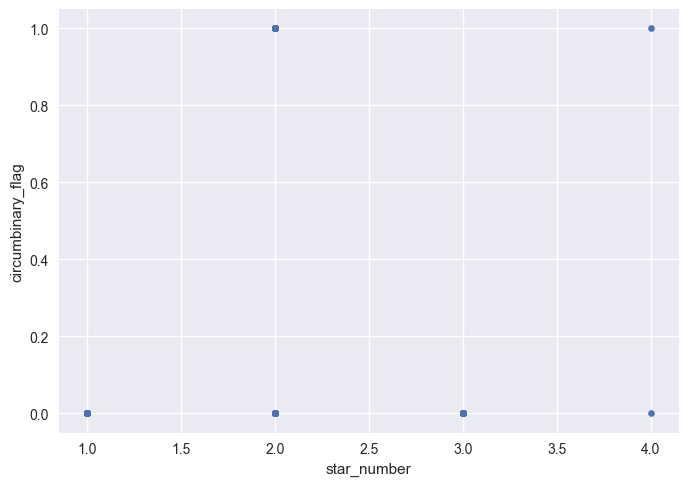

In [661]:
df_explore = df_filtered_3[['circumbinary_flag', 'star_number']]
df_explore.head()
df_explore.plot.scatter(x='star_number', y='circumbinary_flag')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\2497571953.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_explore['circumbinary_flag'].value_counts().index,


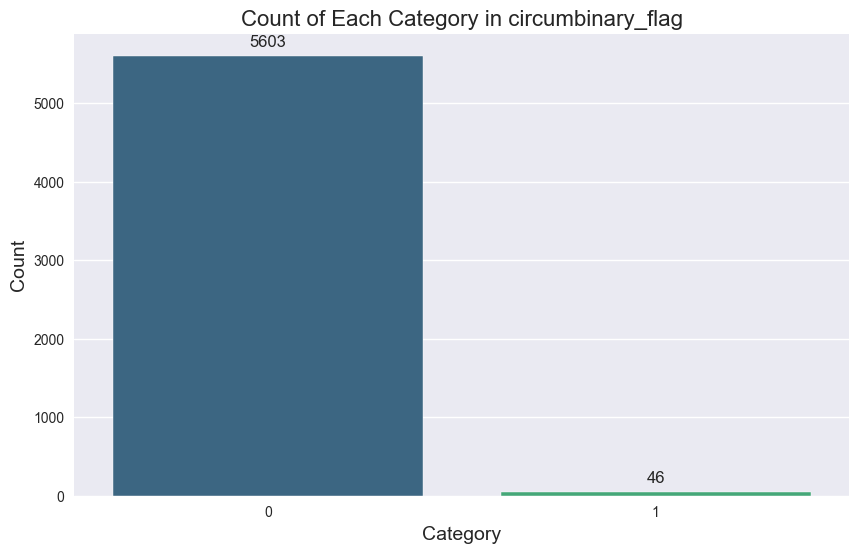

In [662]:


# Configurar o estilo do seaborn

# Criar a figura e os eixos
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras
ax = sns.barplot(x=df_explore['circumbinary_flag'].value_counts().index,
                 y=df_explore['circumbinary_flag'].value_counts().values,
                 palette='viridis')

# Adicionar título e rótulos
ax.set_title('Count of Each Category in circumbinary_flag', fontsize=16)
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Adicionar rótulos de contagem acima das barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Mostrar o gráfico
plt.show()

<Axes: title={'center': 'Distribution of Number of Stars in a System'}, ylabel='Frequency'>

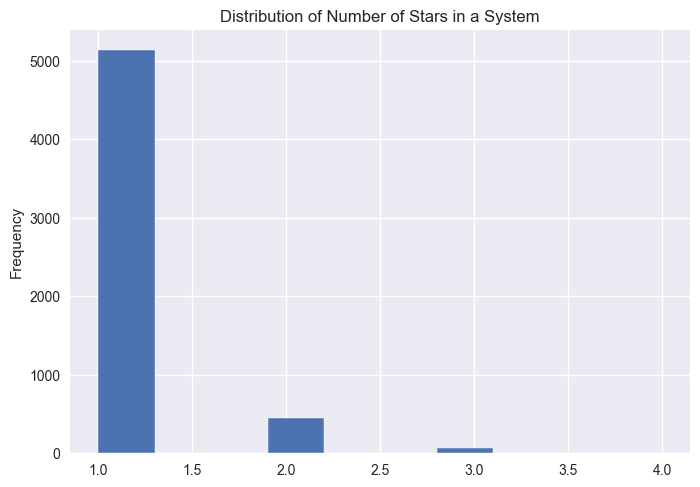

In [663]:
df_explore['star_number'].plot.hist( title='Distribution of Number of Stars in a System')

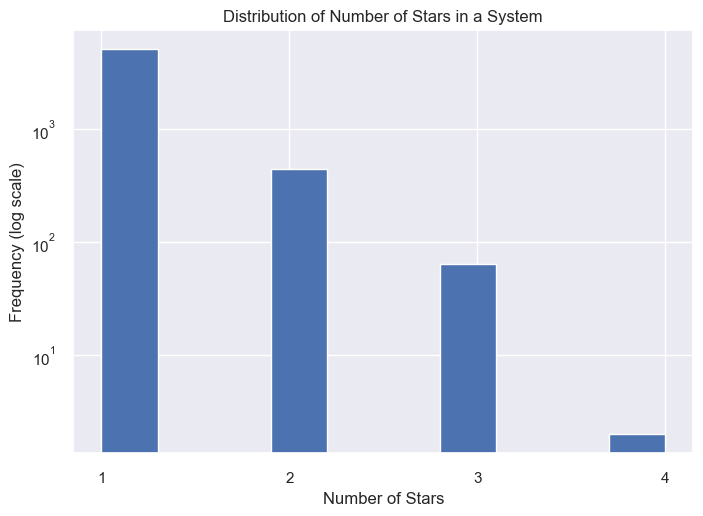

In [664]:
sns.set_theme()
# Plot the histogram
df_explore['star_number'].plot.hist(title='Distribution of Number of Stars in a System', log=True)

# Set the x-axis ticks to be integers
plt.xticks(range(int(df_explore['star_number'].min()), int(df_explore['star_number'].max()) + 1))

# Show the plot
plt.xlabel('Number of Stars')
plt.ylabel('Frequency (log scale)')
plt.show()

Text(0, 0.5, 'Number of Stars in a System')

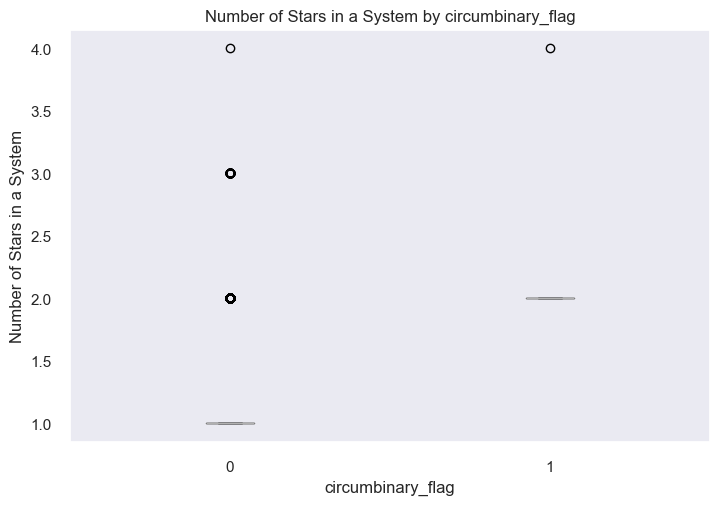

In [665]:
df_explore.boxplot(column='star_number', by='circumbinary_flag', grid=False)
plt.title('Number of Stars in a System by circumbinary_flag')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('circumbinary_flag')
plt.ylabel('Number of Stars in a System')

### 3.2 Discovery telescopes analysis

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\413354438.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_3['discovery_telescope'] = df_filtered_3['discovery_telescope'].replace(to_replace, 'Other')


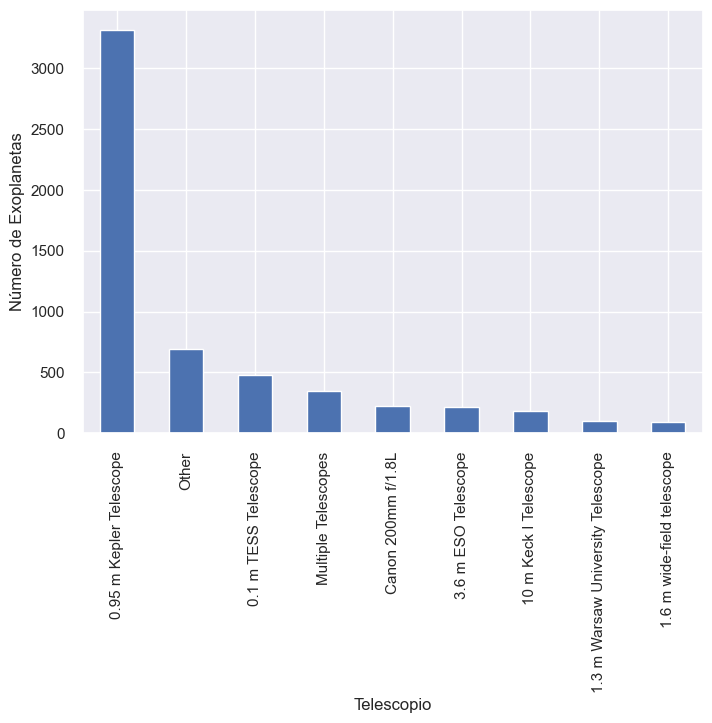

In [666]:
# Calculate value counts
value_counts = df_filtered_3['discovery_telescope'].value_counts()

# Identify values with counts less than 85
to_replace = value_counts[value_counts < 85].index

# Replace these values with "Other"
df_filtered_3['discovery_telescope'] = df_filtered_3['discovery_telescope'].replace(to_replace, 'Other')

# Plot the updated value counts
df_filtered_3['discovery_telescope'].value_counts().plot.bar()
plt.xlabel('Telescopio')
plt.ylabel('Número de Exoplanetas')
plt.show()
# Canon 200mm f/1.8L marked as discovery_telescope in two different projects, thats why its the second most used telescope
# https://science.nasa.gov/mission/kepler/


### 3.3 Discovery instrument analysis

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\2385058711.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_3['discovery_instrument'] = df_filtered_3['discovery_instrument'].replace(to_replace, 'Others')


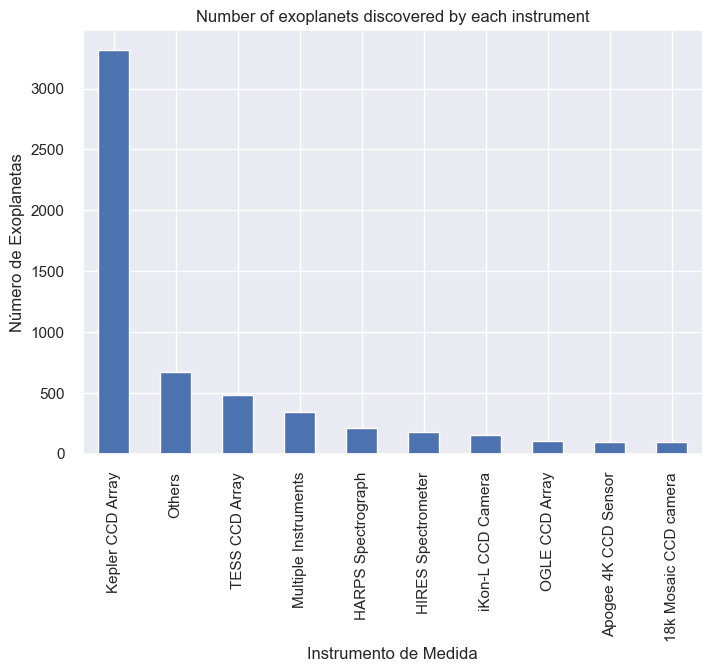

In [667]:
# Calculate value counts
value_counts = df_filtered_3['discovery_instrument'].value_counts()

# Identify values with counts less than 80
to_replace = value_counts[value_counts < 80].index

# Replace these values with "Others"
df_filtered_3['discovery_instrument'] = df_filtered_3['discovery_instrument'].replace(to_replace, 'Others')

# Plot the updated value counts
df_filtered_3['discovery_instrument'].value_counts().plot.bar(title='Number of exoplanets discovered by each instrument')
plt.xlabel('Instrumento de Medida')
plt.ylabel('Número de Exoplanetas')
plt.show()

### 3.4 Discovery facility analysis

K2 is a different mission than kepler, after it had some issues, they changed the way of operation of the satellite.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\390999423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_3['discovery_facility'] = df_filtered_3['discovery_facility'].replace('Transiting Exoplanet Survey Satellite (TESS)', 'TESS')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\390999423.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_4['discovery_facility'] = df_filtered_4['discovery_facility'].replace(to_replace, 'Others')


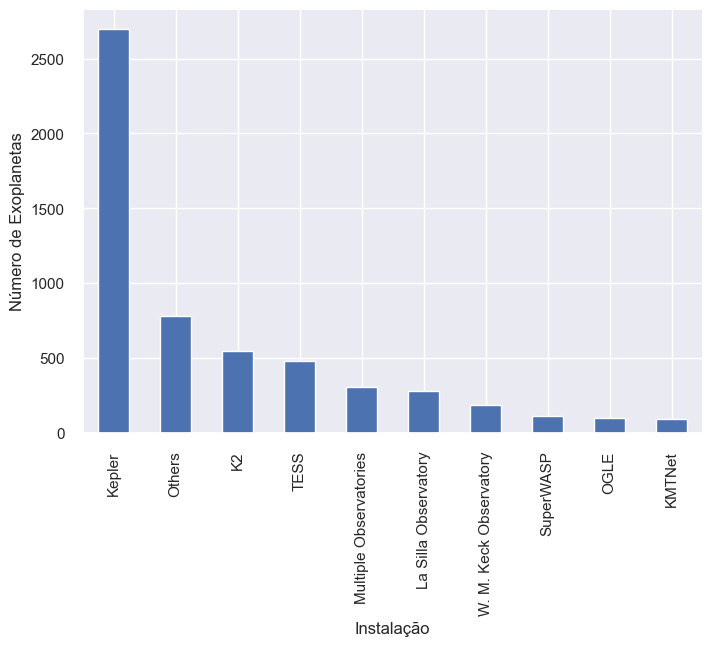

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,star_number,sy_pnum,circumbinary_flag,discoverymethod,disc_year,disc_locale,discovery_facility,discovery_telescope,discovery_instrument,soltype,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_masse,pl_massj,pl_msinie,pl_msinij,pl_cmasse,pl_cmassj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_dens,pl_orbeccen,pl_insol,pl_eqt,pl_orbincl,pl_tranmid,pl_tsystemref,ttv_flag,pl_imppar,pl_trandep,pl_trandur,pl_ratdor,pl_ratror,pl_occdep,pl_orbtper,pl_orblper,pl_rvamp,pl_projobliq,pl_trueobliq,st_spectype,st_teff,st_rad,st_mass,st_met,st_metratio,st_lum,st_logg,st_age,st_dens,st_vsin,st_vsinlim,st_rotp,st_radv,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmra,sy_pmdec,sy_dist,sy_plx,sy_bmag,sy_vmag,sy_jmag,sy_hmag,sy_kmag,sy_umag,sy_gmag,sy_rmag,sy_imag,sy_zmag,sy_w1mag,sy_w2mag,sy_w3mag,sy_w4mag,sy_gaiamag,sy_icmag,sy_tmag,sy_kepmag,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,1,0,Radial Velocity,2007,Ground,Others,Other,Others,Published Confirmed,323.210000,1.178000,NaN,NaN,NaN,NaN,4914.89849,15.4640,NaN,NaN,4914.89849,15.4640,Msini,NaN,0.2380,NaN,NaN,NaN,NaN,JD,0,NaN,NaN,NaN,NaN,NaN,NaN,2454519.400,91.330,288.630,NaN,NaN,G8 III,4874.0,13.76,2.09,-0.26,[Fe/H],1.978,2.45,NaN,NaN,NaN,NaN,NaN,NaN,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,78.28058,264.13775,18.33392,177.41790,140.383627,-109.24100,88.1701,93.1846,10.71040,5.726,4.72307,2.943,2.484,2.282,NaN,NaN,NaN,NaN,NaN,0.639,0.732,2.358,2.270,4.44038,NaN,3.83790,NaN,2023-09-19,2023-08,2023-09-19,2,1,2,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,1,0,Radial Velocity,2009,Ground,Others,Other,Others,Published Confirmed,516.219970,1.530000,NaN,NaN,NaN,NaN,4684.81420,14.7400,NaN,NaN,4684.81420,14.7400,Msini,NaN,0.0800,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.700,NaN,NaN,NaN,4213.0,29.79,2.78,-0.02,[Fe/H],NaN,1.93,NaN,NaN,NaN,NaN,NaN,NaN,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,41.04437,108.71900,74.95821,141.64699,10.679019,3.42996,10.1132,125.3210,7.95388,6.382,5.01300,2.876,2.091,1.939,NaN,NaN,NaN,NaN,NaN,-0.290,0.143,1.894,1.787,4.56216,NaN,3.82294,NaN,2018-09-04,2017-03,2018-09-06,0,1,1,0,0,0
6,7,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,1,0,Radial Velocity,2008,Ground,Others,Other,Others,Published Confirmed,186.760000,0.775000,NaN,NaN,NaN,NaN,1131.15130,3.5590,NaN,NaN,1131.15130,3.5590,Msini,NaN,0.0000,NaN,NaN,NaN,NaN,JD,0,NaN,NaN,NaN,NaN,NaN,NaN,2452853.000,0.000,86.080,NaN,NaN,K0 III,4888.0,11.55,1.78,-0.21,[Fe/H],1.840,2.55,NaN,NaN,NaN,NaN,NaN,NaN,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,-21.05141,106.41269,38.22901,11.95935,299.252618,287.29200,-83.7582,75.4392,13.22890,6.256,5.23133,3.019,2.608,2.331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.91781,NaN,4.32140,NaN,2023-09-19,2023-08,2023-09-19,0,1,1,0,0,0
11,12,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,1,2,0,Radial Velocity,2002,Ground,W. M. Keck Observatory,10 m Keck I Telescope,HIRES Spectrometer,Published Confirmed,1765.038900,2.774000,NaN,NaN,2559.47216,8.053,NaN,NaN,NaN,NaN,2559.47216,8.0530,Mass,NaN,0.3730,NaN,NaN,144.652,NaN,BJD,0,NaN,NaN,NaN,NaN,NaN,NaN,2449614.563,23.043,89.582,NaN,NaN,NaN,NaN,NaN,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,46.94447,69.16849,62.87885,223.24717,324.530306,132.01900,-296.4640,17.9323,55.73630,7.495,6.61935,5.158,4.803,4.714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.38300,NaN,5.86310,NaN,2023-06-12,2022-09,2023-06-12,0,1,4,1,0,0
22,23,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,1,3,1,0,Radial Velocity,1996,Ground,Multiple Observatories,Multiple Telescopes,Multiple Instruments,Published Confirmed,798.500000,1.660000,NaN,NaN,NaN,NaN,565.73740,1.780

In [668]:
# Rename "Transiting Exoplanet Survey Satellite (TESS)" to "TESS"
df_filtered_3['discovery_facility'] = df_filtered_3['discovery_facility'].replace('Transiting Exoplanet Survey Satellite (TESS)', 'TESS')

df_filtered_4 = df_filtered_3[df_filtered_3['soltype'] == 'Published Confirmed']
# Calculate value counts
value_counts = df_filtered_4['discovery_facility'].value_counts()

# Identify values with counts less than 94
to_replace = value_counts[value_counts < 94].index

# Replace these values with "Others"
df_filtered_4['discovery_facility'] = df_filtered_4['discovery_facility'].replace(to_replace, 'Others')

# Plot the updated value counts
df_filtered_4['discovery_facility'].value_counts().plot.bar() #title='Number of exoplanets discovered in each facility'
plt.xlabel('Instalação')
plt.ylabel('Número de Exoplanetas')
plt.show()
df_filtered_4

### 3.5 Planets in a same system

In [669]:
df_filtered_3

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,star_number,sy_pnum,circumbinary_flag,discoverymethod,disc_year,disc_locale,discovery_facility,discovery_telescope,discovery_instrument,soltype,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_masse,pl_massj,pl_msinie,pl_msinij,pl_cmasse,pl_cmassj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_dens,pl_orbeccen,pl_insol,pl_eqt,pl_orbincl,pl_tranmid,pl_tsystemref,ttv_flag,pl_imppar,pl_trandep,pl_trandur,pl_ratdor,pl_ratror,pl_occdep,pl_orbtper,pl_orblper,pl_rvamp,pl_projobliq,pl_trueobliq,st_spectype,st_teff,st_rad,st_mass,st_met,st_metratio,st_lum,st_logg,st_age,st_dens,st_vsin,st_vsinlim,st_rotp,st_radv,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmra,sy_pmdec,sy_dist,sy_plx,sy_bmag,sy_vmag,sy_jmag,sy_hmag,sy_kmag,sy_umag,sy_gmag,sy_rmag,sy_imag,sy_zmag,sy_w1mag,sy_w2mag,sy_w3mag,sy_w4mag,sy_gaiamag,sy_icmag,sy_tmag,sy_kepmag,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,1,0,Radial Velocity,2007,Ground,Xinglong Station,Other,Others,Published Confirmed,323.210000,1.178000,NaN,NaN,NaN,NaN,4914.89849,15.4640,NaN,NaN,4914.89849,15.4640,Msini,NaN,0.2380,NaN,NaN,NaN,NaN,JD,0,NaN,NaN,NaN,NaN,NaN,NaN,2454519.400,91.330,288.630,NaN,NaN,G8 III,4874.0,13.76,2.09,-0.26,[Fe/H],1.978,2.45,NaN,NaN,NaN,NaN,NaN,NaN,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,78.28058,264.13775,18.33392,177.41790,140.383627,-109.24100,88.1701,93.1846,10.71040,5.726,4.72307,2.943,2.484,2.282,NaN,NaN,NaN,NaN,NaN,0.639,0.732,2.358,2.270,4.44038,NaN,3.83790,NaN,2023-09-19,2023-08,2023-09-19,2,1,2,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,1,0,Radial Velocity,2009,Ground,Thueringer Landessternwarte Tautenburg,Other,Others,Published Confirmed,516.219970,1.530000,NaN,NaN,NaN,NaN,4684.81420,14.7400,NaN,NaN,4684.81420,14.7400,Msini,NaN,0.0800,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.700,NaN,NaN,NaN,4213.0,29.79,2.78,-0.02,[Fe/H],NaN,1.93,NaN,NaN,NaN,NaN,NaN,NaN,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,41.04437,108.71900,74.95821,141.64699,10.679019,3.42996,10.1132,125.3210,7.95388,6.382,5.01300,2.876,2.091,1.939,NaN,NaN,NaN,NaN,NaN,-0.290,0.143,1.894,1.787,4.56216,NaN,3.82294,NaN,2018-09-04,2017-03,2018-09-06,0,1,1,0,0,0
6,7,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,1,0,Radial Velocity,2008,Ground,Okayama Astrophysical Observatory,Other,Others,Published Confirmed,186.760000,0.775000,NaN,NaN,NaN,NaN,1131.15130,3.5590,NaN,NaN,1131.15130,3.5590,Msini,NaN,0.0000,NaN,NaN,NaN,NaN,JD,0,NaN,NaN,NaN,NaN,NaN,NaN,2452853.000,0.000,86.080,NaN,NaN,K0 III,4888.0,11.55,1.78,-0.21,[Fe/H],1.840,2.55,NaN,NaN,NaN,NaN,NaN,NaN,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,-21.05141,106.41269,38.22901,11.95935,299.252618,287.29200,-83.7582,75.4392,13.22890,6.256,5.23133,3.019,2.608,2.331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.91781,NaN,4.32140,NaN,2023-09-19,2023-08,2023-09-19,0,1,1,0,0,0
11,12,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,1,2,0,Radial Velocity,2002,Ground,W. M. Keck Observatory,10 m Keck I Telescope,HIRES Spectrometer,Published Confirmed,1765.038900,2.774000,NaN,NaN,2559.47216,8.053,NaN,NaN,NaN,NaN,2559.47216,8.0530,Mass,NaN,0.3730,NaN,NaN,144.652,NaN,BJD,0,NaN,NaN,NaN,NaN,NaN,NaN,2449614.563,23.043,89.582,NaN,NaN,NaN,NaN,NaN,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,46.94447,69.16849,62.87885,223.24717,324.530306,132.01900,-296.4640,17.9323,55.73630,7.495,6.61935,5.158,4.803,4.714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.38300,NaN,5.86310,NaN,2023-06-12,2022-09,2023-06-12,0,1,4,1,0,0
22,23,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,1,3,1,0,Radial Velocity,1996,Ground,Multiple Observatories,Multiple Telescopes,Multiple Instruments,Pu

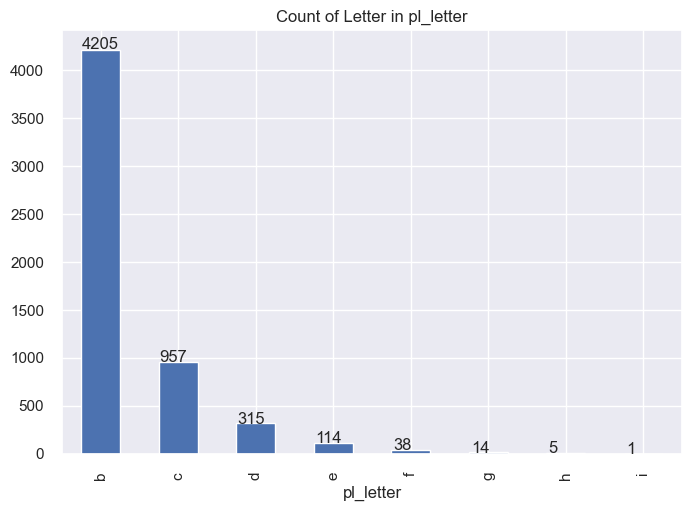

In [670]:

# Plot the bar chart
ax = df_filtered_3['pl_letter'].value_counts().plot.bar(title='Count of Letter in pl_letter')

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Show the plot
plt.show()

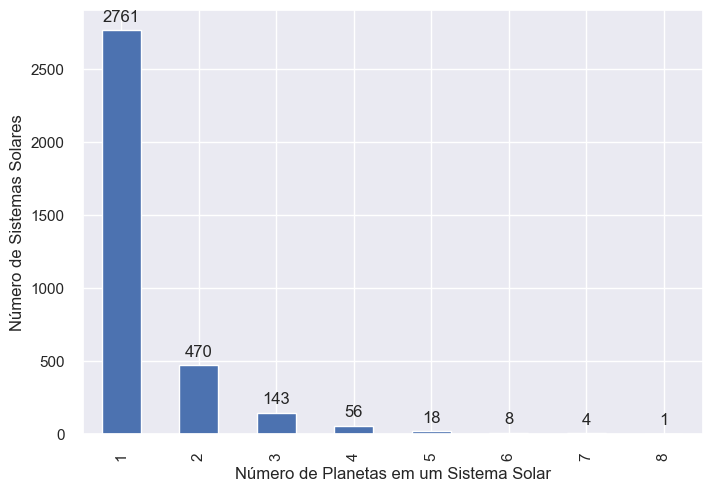

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,star_number,sy_pnum,circumbinary_flag,discoverymethod,disc_year,disc_locale,discovery_facility,discovery_telescope,discovery_instrument,soltype,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_masse,pl_massj,pl_msinie,pl_msinij,pl_cmasse,pl_cmassj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_dens,pl_orbeccen,pl_insol,pl_eqt,pl_orbincl,pl_tranmid,pl_tsystemref,ttv_flag,pl_imppar,pl_trandep,pl_trandur,pl_ratdor,pl_ratror,pl_occdep,pl_orbtper,pl_orblper,pl_rvamp,pl_projobliq,pl_trueobliq,st_spectype,st_teff,st_rad,st_mass,st_met,st_metratio,st_lum,st_logg,st_age,st_dens,st_vsin,st_vsinlim,st_rotp,st_radv,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmra,sy_pmdec,sy_dist,sy_plx,sy_bmag,sy_vmag,sy_jmag,sy_hmag,sy_kmag,sy_umag,sy_gmag,sy_rmag,sy_imag,sy_zmag,sy_w1mag,sy_w2mag,sy_w3mag,sy_w4mag,sy_gaiamag,sy_icmag,sy_tmag,sy_kepmag,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
2852,2853,HD 219134 h,HD 219134,7,HD 219134,HIP 114622,TIC 283722336,Gaia DR2 2009481748875806976,1,1,6,0,Radial Velocity,2015,Ground,Roque de los Muchachos Observatory,Other,Others,Published Confirmed,2247.000000,3.110000,NaN,NaN,NaN,NaN,108.06220,0.3400,NaN,NaN,108.06220,0.34000,Msini,NaN,0.0600,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,2448725.000,215.00,6.10,NaN,NaN,K3 V,4913.0,0.77,0.79,0.08,[Fe/H],-0.509,4.51,12.46,NaN,NaN,NaN,NaN,NaN,23h13m20.93s,348.337203,+57d10m10.65s,57.169626,-3.20073,109.90724,54.54155,23.75174,2095.380747,2074.52000,294.9360,6.53127,153.0810,6.585,5.56911,3.981,3.469,3.261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.24020,NaN,4.6278,NaN,2015-11-18,2015-11,2015-11-19,3,1,4,5,0,0
5920,5921,KMT-2021-BLG-1253L b,KMT-2021-BLG-1253L,1,NaN,NaN,NaN,NaN,1,1,1,0,Microlensing,2022,Ground,KMTNet,1.6 m wide-field telescope,18k Mosaic CCD camera,Published Confirmed,NaN,1.520000,NaN,NaN,19.05000,0.05994,NaN,NaN,NaN,NaN,19.05000,0.05994,Mass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17h50m28.13s,267.617208,-29d16m45.41s,-29.279281,-1.08408,0.25345,-5.85728,267.90698,NaN,NaN,NaN,6640.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-17,2022-11,2023-02-17,5,0,0,0,0,0
5925,5926,KMT-2021-BLG-1303L b,KMT-2021-BLG-1303L,1,NaN,NaN,NaN,NaN,1,1,1,0,Microlensing,2022,Ground,KMTNet,1.6 m wide-field telescope,18k Mosaic CCD camera,Published Confirmed,NaN,2.890000,NaN,NaN,120.77479,0.38000,NaN,NaN,NaN,NaN,120.77479,0.38000,Mass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18h07m27.33s,271.863875,-29d16m53.69s,-29.281581,-4.29901,2.09502,-5.85287,271.63031,NaN,NaN,NaN,6280.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-31,2022-08,2022-10-31,0,0,0,0,0,0
5927,5928,KMT-2021-BLG-1372L b,KMT-2021-BLG-1372L,1,NaN,NaN,NaN,NaN,1,1,1,0,Microlensing,2022,Ground,KMTNet,1.6 m wide-field telescope,18k Mosaic CCD camera,Published Confirmed,NaN,2.370000,NaN,NaN,61.27000,0.19278,NaN,NaN,NaN,NaN,61.27000,0.19278,Mass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17h37m57.25s,264.488542,-28d08m54.20s,-28.148389,1.84567,359.78034,-4.80233,265.12104,NaN,NaN,NaN,5970.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-17,2022-11,2023-02-17,3,0,0,0,0,0
5933,5934,KMT-2021-BLG-1391L b,KMT-2021-BLG-1391L,1,NaN,NaN,NaN,NaN,1,1,1,0,Microlensing,2022,Ground,KMTNet,1.6 m wide-field telescope,18k Mosaic CCD camera,Published Confirmed,NaN,2.290000,NaN,NaN,4.55000,0.01432,NaN,NaN,NaN,NaN,4.55000,0.01432,Mass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18h02m44.06s,270.683583,-28d03m37.80s,-28.060500,-2.80007,2.65873,-4.62265,

In [671]:


# Create a new DataFrame df_astros from df_filtered_3
df_astros = df_filtered_3.copy()

# Define the letters in reverse order
letters = ['i', 'h', 'g', 'f', 'e', 'd', 'c', 'b']

# Define the number of rows to remove for each letter
remove_counts = {
    'i': 1,
    'h': 5,
    'g': 14,
    'f': 38,
    'e': 114,
    'd': 315,
    'c': 957,
    'b': 4205
}

# Iterate through the letters in reverse order
for letter in letters:
    # Identify the rows where pl_letter is the current letter
    letter_indices = df_astros[df_astros['pl_letter'] == letter].index
    
    # Remove the required number of rows for each preceding letter
    for preceding_letter in letters[letters.index(letter) + 1:]:
        preceding_indices = df_astros[df_astros['pl_letter'] == preceding_letter].index
        if not preceding_indices.empty:
            df_astros = df_astros.drop(preceding_indices[:remove_counts[letter]])

# Define the mapping from letters to numbers
letter_to_number = {
    'i': '8',
    'h': '7',
    'g': '6',
    'f': '5',
    'e': '4',
    'd': '3',
    'c': '2',
    'b': '1'
}

# Transform the letters to numbers
df_astros['pl_letter'] = df_astros['pl_letter'].replace(letter_to_number)

# Plot the updated value counts
ax = df_astros['pl_letter'].value_counts().sort_index().plot.bar()
plt.xlabel('Número de Planetas em um Sistema Solar')
plt.ylabel('Número de Sistemas Solares')

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

df_astros

### 3.6 Confirmed vs ?

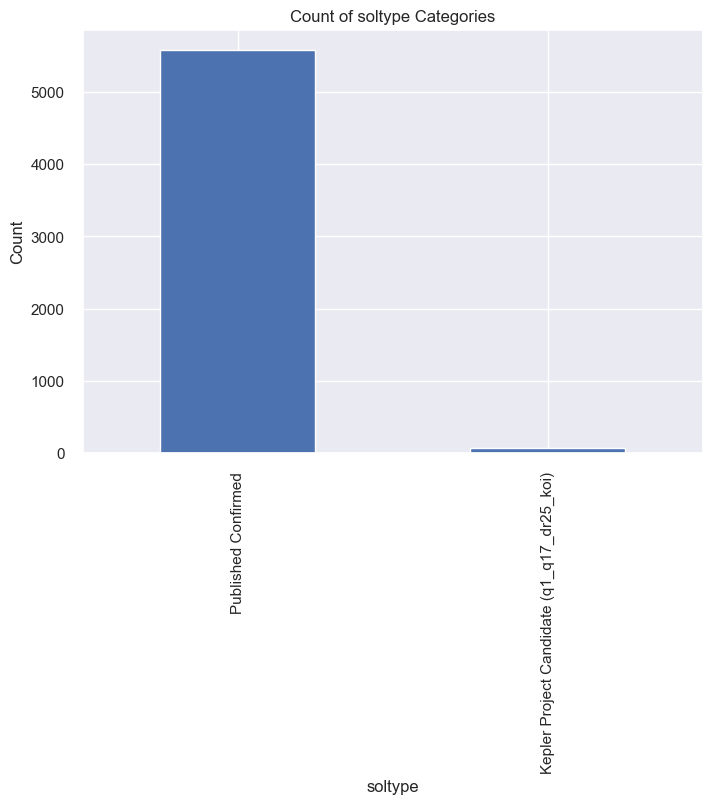

In [672]:

# Count the occurrences of each soltype
soltype_counts = df_filtered_3['soltype'].value_counts()

# Plot the results
soltype_counts.plot.bar(title='Count of soltype Categories')
plt.xlabel('soltype')
plt.ylabel('Count')
plt.show()

### 3.7 Discovery Techniques

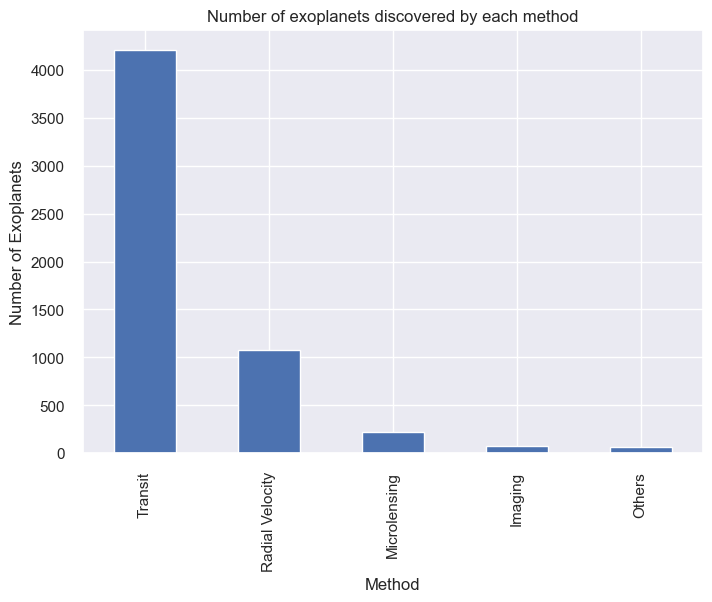

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,star_number,sy_pnum,circumbinary_flag,discoverymethod,disc_year,disc_locale,discovery_facility,discovery_telescope,discovery_instrument,soltype,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_masse,pl_massj,pl_msinie,pl_msinij,pl_cmasse,pl_cmassj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_dens,pl_orbeccen,pl_insol,pl_eqt,pl_orbincl,pl_tranmid,pl_tsystemref,ttv_flag,pl_imppar,pl_trandep,pl_trandur,pl_ratdor,pl_ratror,pl_occdep,pl_orbtper,pl_orblper,pl_rvamp,pl_projobliq,pl_trueobliq,st_spectype,st_teff,st_rad,st_mass,st_met,st_metratio,st_lum,st_logg,st_age,st_dens,st_vsin,st_vsinlim,st_rotp,st_radv,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmra,sy_pmdec,sy_dist,sy_plx,sy_bmag,sy_vmag,sy_jmag,sy_hmag,sy_kmag,sy_umag,sy_gmag,sy_rmag,sy_imag,sy_zmag,sy_w1mag,sy_w2mag,sy_w3mag,sy_w4mag,sy_gaiamag,sy_icmag,sy_tmag,sy_kepmag,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,1,0,Radial Velocity,2007,Ground,Xinglong Station,Other,Others,Published Confirmed,323.210000,1.178000,NaN,NaN,NaN,NaN,4914.89849,15.4640,NaN,NaN,4914.89849,15.4640,Msini,NaN,0.2380,NaN,NaN,NaN,NaN,JD,0,NaN,NaN,NaN,NaN,NaN,NaN,2454519.400,91.330,288.630,NaN,NaN,G8 III,4874.0,13.76,2.09,-0.26,[Fe/H],1.978,2.45,NaN,NaN,NaN,NaN,NaN,NaN,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,78.28058,264.13775,18.33392,177.41790,140.383627,-109.24100,88.1701,93.1846,10.71040,5.726,4.72307,2.943,2.484,2.282,NaN,NaN,NaN,NaN,NaN,0.639,0.732,2.358,2.270,4.44038,NaN,3.83790,NaN,2023-09-19,2023-08,2023-09-19,2,1,2,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,1,0,Radial Velocity,2009,Ground,Thueringer Landessternwarte Tautenburg,Other,Others,Published Confirmed,516.219970,1.530000,NaN,NaN,NaN,NaN,4684.81420,14.7400,NaN,NaN,4684.81420,14.7400,Msini,NaN,0.0800,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.700,NaN,NaN,NaN,4213.0,29.79,2.78,-0.02,[Fe/H],NaN,1.93,NaN,NaN,NaN,NaN,NaN,NaN,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,41.04437,108.71900,74.95821,141.64699,10.679019,3.42996,10.1132,125.3210,7.95388,6.382,5.01300,2.876,2.091,1.939,NaN,NaN,NaN,NaN,NaN,-0.290,0.143,1.894,1.787,4.56216,NaN,3.82294,NaN,2018-09-04,2017-03,2018-09-06,0,1,1,0,0,0
6,7,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,1,0,Radial Velocity,2008,Ground,Okayama Astrophysical Observatory,Other,Others,Published Confirmed,186.760000,0.775000,NaN,NaN,NaN,NaN,1131.15130,3.5590,NaN,NaN,1131.15130,3.5590,Msini,NaN,0.0000,NaN,NaN,NaN,NaN,JD,0,NaN,NaN,NaN,NaN,NaN,NaN,2452853.000,0.000,86.080,NaN,NaN,K0 III,4888.0,11.55,1.78,-0.21,[Fe/H],1.840,2.55,NaN,NaN,NaN,NaN,NaN,NaN,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,-21.05141,106.41269,38.22901,11.95935,299.252618,287.29200,-83.7582,75.4392,13.22890,6.256,5.23133,3.019,2.608,2.331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.91781,NaN,4.32140,NaN,2023-09-19,2023-08,2023-09-19,0,1,1,0,0,0
11,12,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,1,2,0,Radial Velocity,2002,Ground,W. M. Keck Observatory,10 m Keck I Telescope,HIRES Spectrometer,Published Confirmed,1765.038900,2.774000,NaN,NaN,2559.47216,8.053,NaN,NaN,NaN,NaN,2559.47216,8.0530,Mass,NaN,0.3730,NaN,NaN,144.652,NaN,BJD,0,NaN,NaN,NaN,NaN,NaN,NaN,2449614.563,23.043,89.582,NaN,NaN,NaN,NaN,NaN,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,46.94447,69.16849,62.87885,223.24717,324.530306,132.01900,-296.4640,17.9323,55.73630,7.495,6.61935,5.158,4.803,4.714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.38300,NaN,5.86310,NaN,2023-06-12,2022-09,2023-06-12,0,1,4,1,0,0
22,23,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,1,3,1,0,Radial Velocity,1996,Ground,Multiple Observatories,Multiple Telescopes,Multiple Instruments,Pu

In [673]:

# Start with the original DataFrame each time
df_methods = df_filtered_3.copy()

# Calculate value counts
value_counts = df_methods['discoverymethod'].value_counts()

# Identify values with counts less than the threshold
threshold = 40  # Change this value to 50 or any other value as needed
to_replace = value_counts[value_counts < threshold].index

# Replace these values with "Others"
df_methods['discoverymethod'] = df_methods['discoverymethod'].replace(to_replace, 'Others')

# Plot the updated value counts
df_methods['discoverymethod'].value_counts().plot.bar(title='Number of exoplanets discovered by each method')
plt.xlabel('Method')
plt.ylabel('Number of Exoplanets')
plt.show()

df_filtered_3

### 3.8 

In [674]:
# Filtrar e preparar os dados
df_plot = df_filtered_3.copy()
df_plot_2 = df_plot[['pl_orbper', 'pl_bmassj', 'discoverymethod', 'pl_rade', 'disc_year']]


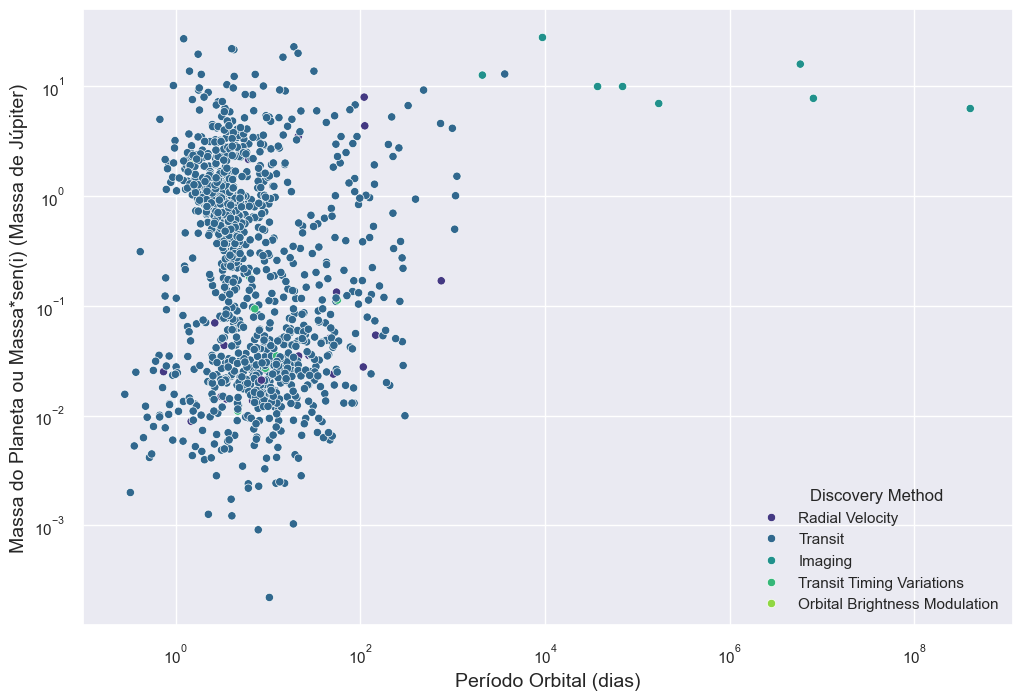

In [675]:


df_plot_3 = df_plot_2.copy()
df_plot_3.dropna(inplace=True)

# Configurar o estilo do seaborn
sns.set(style="darkgrid")

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=df_plot_3, x='pl_orbper', y='pl_bmassj', hue='discoverymethod', palette='viridis')

# Colocar os eixos em escala logarítmica
scatter_plot.set_xscale('log')
scatter_plot.set_yscale('log')

# Adicionar título e rótulos
scatter_plot.set_xlabel('Período Orbital (dias)', fontsize=14)
scatter_plot.set_ylabel('Massa do Planeta ou Massa*sen(i) (Massa de Júpiter)', fontsize=14)

# Mostrar a legenda dentro do gráfico
plt.legend(title='Discovery Method', loc='lower right')

# Mostrar o gráfico
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\1150557866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_4.dropna(inplace=True)


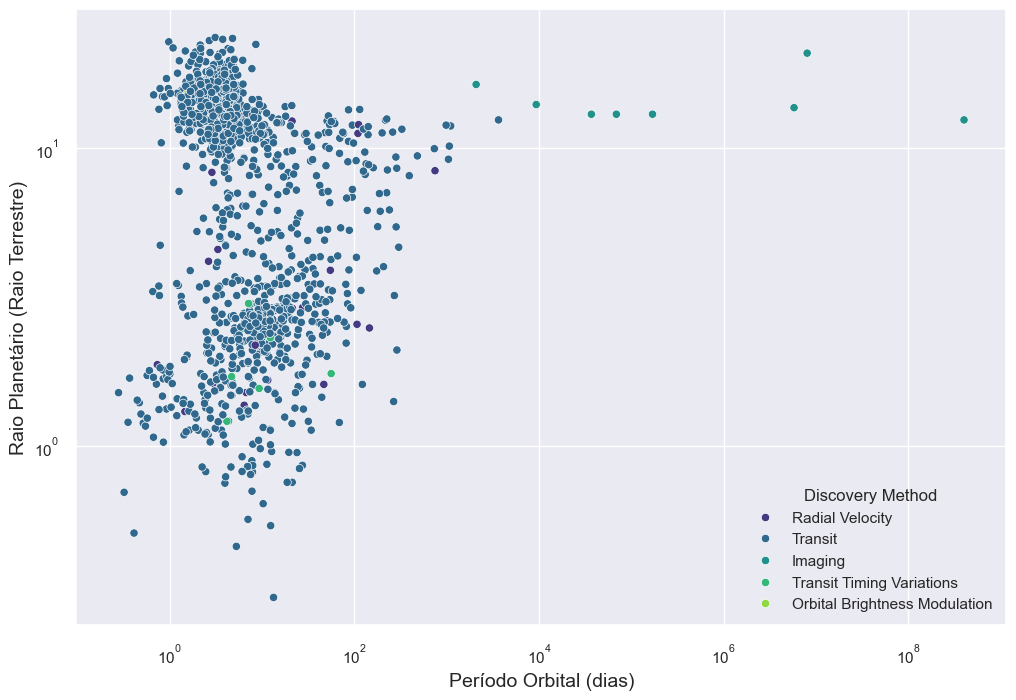

In [676]:
df_plot_4 = df_plot_2[['pl_orbper', 'pl_rade']]

df_plot_4.dropna(inplace=True)

# Configurar o estilo do seaborn
sns.set(style="darkgrid")

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=df_plot_3, x='pl_orbper', y='pl_rade', hue='discoverymethod', palette='viridis')

# Colocar os eixos em escala logarítmica
scatter_plot.set_xscale('log')
scatter_plot.set_yscale('log')

# Adicionar título e rótulos
scatter_plot.set_xlabel('Período Orbital (dias)', fontsize=14)
scatter_plot.set_ylabel('Raio Planetário (Raio Terrestre)', fontsize=14)

# Mostrar a legenda dentro do gráfico
plt.legend(title='Discovery Method', loc='lower right')

# Mostrar o gráfico
plt.show()

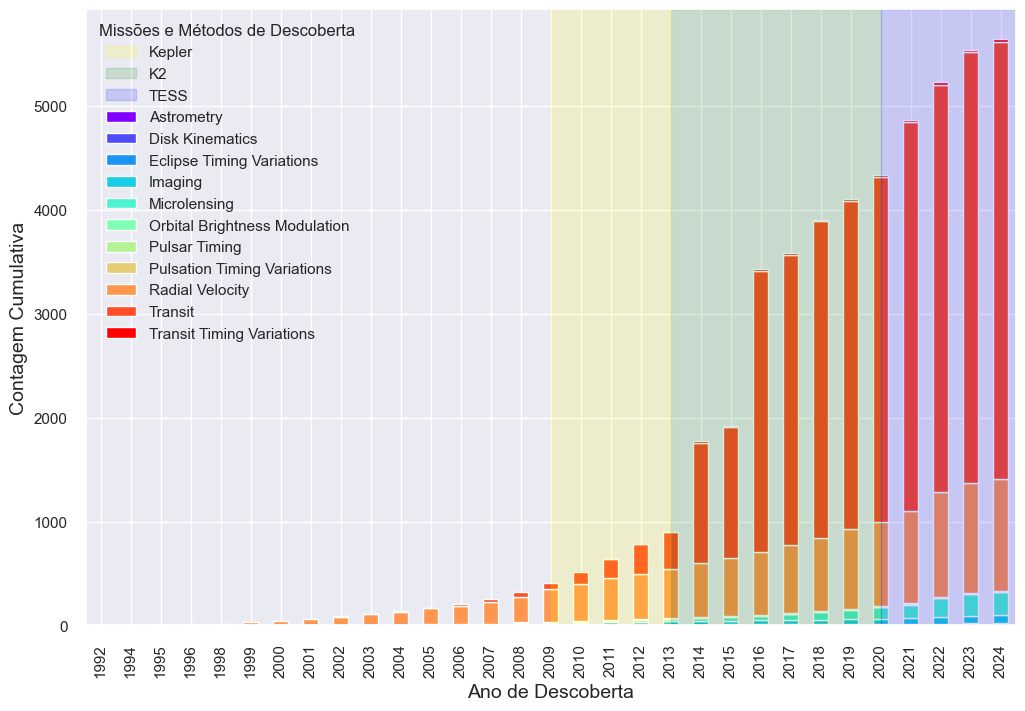

In [677]:
# Filtrar e preparar os dados
df_plot_5 = df_plot_2[['disc_year', 'discoverymethod']]

# Criar uma tabela de contagem cumulativa
cumulative_counts = df_plot_5.groupby(['disc_year', 'discoverymethod']).size().unstack().fillna(0).cumsum()

# Configurar o estilo do seaborn
sns.set(style="darkgrid")

# Criar o gráfico de barras empilhadas com uma paleta de cores distinta
ax = cumulative_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='rainbow')

# Adicionar título e rótulos
plt.xlabel('Ano de Descoberta', fontsize=14)
plt.ylabel('Contagem Cumulativa', fontsize=14)

# Adicionar anotações para os períodos de operação
plt.axvspan(2007 - cumulative_counts.index[0], 2011 - cumulative_counts.index[0], color='yellow', alpha=0.15, label='Kepler')
plt.axvspan(2011 - cumulative_counts.index[0], 2018 - cumulative_counts.index[0], color='green', alpha=0.15, label='K2')
plt.axvspan(2018 - cumulative_counts.index[0], len(cumulative_counts.index), color='blue', alpha=0.15, label='TESS')

# Mostrar a legenda dentro do gráfico
plt.legend(title='Missões e Métodos de Descoberta', loc='upper left')

# Mostrar o gráfico
plt.show()

## 5 - SECTION 5 -TESS

### 5.1 Data Cleaning

In [678]:

# Substitua 'caminho_para_seu_arquivo.csv' pelo caminho do seu arquivo CSV
file = 'tess_candidates.csv'
df_tess = pd.read_csv(file)

df_tess

,rowid,toi,toipfx,tid,ctoi_alias,pl_pnum,tfopwg_disp,rastr,ra,raerr1,raerr2,decstr,dec,decerr1,decerr2,st_pmra,st_pmraerr1,st_pmraerr2,st_pmralim,st_pmrasymerr,st_pmdec,st_pmdecerr1,st_pmdecerr2,st_pmdeclim,st_pmdecsymerr,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tranmidsymerr,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpersymerr,pl_trandurh,pl_trandurherr1,pl_trandurherr2,pl_trandurhlim,pl_trandurhsymerr,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandepsymerr,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radesymerr,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_insolsymerr,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_eqtsymerr,st_tmag,st_tmagerr1,st_tmagerr2,st_tmaglim,st_tmagsymerr,st_dist,st_disterr1,st_disterr2,st_distlim,st_distsymerr,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffsymerr,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_loggsymerr,st_rad,st_raderr1,st_raderr2,st_radlim,st_radsymerr,toi_created,rowupdate
0,1,1000.01,1000,50365310,5.036531e+07,1,FP,07h29m25.85s,112.357708,NaN,NaN,-12d41m45.46s,-12.695960,NaN,NaN,-5.964,0.085,-0.085,0.0,1.0,-0.076,0.072,-0.072,0.0,1.0,2.459230e+06,0.001657,-0.001657,0,1,2.171348,0.000264,-0.000264,0,1,2.017220,0.319588,-0.319588,0,1,656.886099,37.778210,-37.778210,0,1,5.818163,1.910546,-1.910546,0,1,22601.948581,NaN,NaN,NaN,NaN,3127.204052,NaN,NaN,NaN,NaN,9.604000,0.013,-0.013,0,1,485.735,11.9515,-11.9515,0,1,10249.0,264.7,-264.7,0,1,4.19,0.07,-0.07,0,1,2.169860,0.072573,-0.072573,0,1,2019-07-24 15:58:33,2021-10-29 12:59:15
1,2,1001.01,1001,88863718,8.886372e+07,1,PC,08h10m19.31s,122.580465,NaN,NaN,-05d30m49.87s,-5.513852,NaN,NaN,-4.956,0.102,-0.102,0.0,1.0,-15.555,0.072,-0.072,0.0,1.0,2.459988e+06,0.001916,-0.001916,0,1,1.931646,0.000005,-0.000005,0,1,3.166000,0.647000,-0.647000,0,1,1286.000000,1186.490000,-1186.490000,0,1,11.215400,2.624200,-2.624200,0,1,44464.500000,NaN,NaN,NaN,NaN,4045.000000,NaN,NaN,NaN,NaN,9.423440,0.006,-0.006,0,1,295.862,5.9100,-5.9100,0,1,7070.0,126.4,-126.4,0,1,4.03,0.09,-0.09,0,1,2.010000,0.090000,-0.090000,0,1,2019-07-24 15:58:33,2023-04-03 14:31:04
2,3,1002.01,1002,124709665,1.247097e+08,1,FP,06h58m54.47s,104.726966,NaN,NaN,-10d34m49.64s,-10.580455,NaN,NaN,-1.462,0.206,-0.206,0.0,1.0,-2.249,0.206,-0.206,0.0,1.0,2.459225e+06,0.000625,-0.000625,0,1,1.867557,0.000003,-0.000003,0,1,1.408000,0.184000,-0.184000,0,1,1500.000000,1.758400,-1.758400,0,1,23.752900,NaN,NaN,0,1,2860.610000,NaN,NaN,NaN,NaN,2037.000000,NaN,NaN,NaN,NaN,9.299501,0.058,-0.058,0,1,943.109,106.3330,-106.3330,0,1,8924.0,124.0,-124.0,0,1,NaN,NaN,NaN,0,1,5.730000,NaN,NaN,0,1,2019-07-24 15:58:33,2022-07-11 16:02:02
3,4,1003.01,1003,106997505,1.069975e+08,1,FP,07h22m14.39s,110.559945,NaN,NaN,-25d12m25.26s,-25.207017,NaN,NaN,-0.939,0.041,-0.041,0.0,1.0,1.640,0.055,-0.055,0.0,1.0,2.458493e+06,0.005350,-0.005350,0,1,2.743230,0.001080,-0.001080,0,1,3.167000,0.642000,-0.642000,0,1,383.410000,0.781988,-0.781988,0,1,NaN,NaN,NaN,0,1,1177.360000,NaN,NaN,NaN,NaN,1631.000000,NaN,NaN,NaN,NaN,9.300300,0.037,-0.037,0,1,7728.170,1899.5700,-1899.5700,0,1,5388.5,567.0,-567.0,0,1,4.15,1.64,-1.64,0,1,NaN,NaN,NaN,0,1,2019-07-24 15:58:33,2022-02-23 10:10:02
4,5,1004.01,1004,238597883,2.385979e+08,1,FP,08h08m42.77s,122.178195,NaN,NaN,-48d48m10.12s,-48.802811,NaN,NaN,-4.496,0.069,-0.069,0.0,1.0,9.347,0.062,-0.062,0.0,1.0,2.459987e+06,0.003748,-0.003748,0,1,3.573014,0.000013,-0.000013,0,1,3.370000,1.029000,-1.029000,0,1,755.000000,1306.550000,-1306.550000,0,1,11.311300,3.247140,-3.247140,0,1,54679.300000,NaN,NaN,NaN,NaN,4260.000000,NaN,NaN,NaN,NaN,9.135500,0.006,-0.006,0,1,356.437,4.6175,-4.6175,0,1,9219.0,171.1,-171.1,0,1,4.14,0.07,-0.07,0,1,2.150000,0.060000,-0.060000,0,1,2019-07-24 15:58:33,2023-03-08 16:02:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [679]:
# List of columns from the DataFrame
columns = [
    "toi", "toipfx", "tid", "ctoi_alias", "pl_pnum", "tfopwg_disp", "rastr", "ra", "raerr1", "raerr2", 
    "decstr", "dec", "decerr1", "decerr2", "st_pmra", "st_pmraerr1", "st_pmraerr2", "st_pmralim", 
    "st_pmrasymerr", "st_pmdec", "st_pmdecerr1", "st_pmdecerr2", "st_pmdeclim", "st_pmdecsymerr", 
    "pl_tranmid", "pl_tranmiderr1", "pl_tranmiderr2", "pl_tranmidlim", "pl_tranmidsymerr", "pl_orbper", 
    "pl_orbpererr1", "pl_orbpererr2", "pl_orbperlim", "pl_orbpersymerr", "pl_trandurh", "pl_trandurherr1", 
    "pl_trandurherr2", "pl_trandurhlim", "pl_trandurhsymerr", "pl_trandep", "pl_trandeperr1", "pl_trandeperr2", 
    "pl_trandeplim", "pl_trandepsymerr", "pl_rade", "pl_radeerr1", "pl_radeerr2", "pl_radelim", "pl_radesymerr", 
    "pl_insol", "pl_insolerr1", "pl_insolerr2", "pl_insollim", "pl_insolsymerr", "pl_eqt", "pl_eqterr1", 
    "pl_eqterr2", "pl_eqtlim", "pl_eqtsymerr", "st_tmag", "st_tmagerr1", "st_tmagerr2", "st_tmaglim", 
    "st_tmagsymerr", "st_dist", "st_disterr1", "st_disterr2", "st_distlim", "st_distsymerr", "st_teff", 
    "st_tefferr1", "st_tefferr2", "st_tefflim", "st_teffsymerr", "st_logg", "st_loggerr1", "st_loggerr2", 
    "st_logglim", "st_loggsymerr", "st_rad", "st_raderr1", "st_raderr2", "st_radlim", "st_radsymerr", 
    "toi_created"
]

# Filter columns that end with 'err', 'err1', 'err2', or 'lim'
filtered_columns = [col for col in columns if col.endswith(('err', 'err1', 'err2', 'lim'))]

print(filtered_columns)

['raerr1', 'raerr2', 'decerr1', 'decerr2', 'st_pmraerr1', 'st_pmraerr2', 'st_pmralim', 'st_pmrasymerr', 'st_pmdecerr1', 'st_pmdecerr2', 'st_pmdeclim', 'st_pmdecsymerr', 'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_tranmidlim', 'pl_tranmidsymerr', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbpersymerr', 'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandurhlim', 'pl_trandurhsymerr', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_trandeplim', 'pl_trandepsymerr', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radesymerr', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_insolsymerr', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'pl_eqtsymerr', 'st_tmagerr1', 'st_tmagerr2', 'st_tmaglim', 'st_tmagsymerr', 'st_disterr1', 'st_disterr2', 'st_distlim', 'st_distsymerr', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_teffsymerr', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'st_loggsymerr', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_radsymerr']


In [680]:
df_filter_tess = df_tess
# Filter the DataFrame to keep rows where pl_orbperlim is 0 or NaN
#df_filtered_2 = df_filtered_1[df_filtered_1['pl_orbperlim'].isin([0]) | df_filtered_1['pl_orbperlim'].isna()]
#df_filtered_3 = df_filtered_2[df_filtered_2['pl_orbsmaxlim'].isin([0]) | df_filtered_2['pl_orbsmaxlim'].isna()]
#df_filtered_4 = df_filtered_3[df_filtered_3['pl_radelim'].isin([0]) | df_filtered_3['pl_radelim'].isna()]
#df_filtered_5 = df_filtered_4[df_filtered_4['pl_radjlim'].isin([0]) | df_filtered_4['pl_radjlim'].isna()]
#df_filtered_6 = df_filtered_5[df_filtered_5['pl_msinielim'].isin([0]) | df_filtered_5['pl_msinielim'].isna()]
#df_filtered_7 = df_filtered_6[df_filtered_6['pl_msinijlim'].isin([0]) | df_filtered_6['pl_msinijlim'].isna()]

columns_to_drop = ['raerr1', 'raerr2', 'decerr1', 'decerr2', 'st_pmraerr1', 'st_pmraerr2', 'st_pmralim', 
                   'st_pmrasymerr', 'st_pmdecerr1', 'st_pmdecerr2', 'st_pmdeclim', 'st_pmdecsymerr', 
                   'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_tranmidlim', 'pl_tranmidsymerr', 'pl_orbpererr1', 
                   'pl_orbpererr2', 'pl_orbperlim', 'pl_orbpersymerr', 'pl_trandurherr1', 'pl_trandurherr2',
                     'pl_trandurhlim', 'pl_trandurhsymerr', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_trandeplim', 
                     'pl_trandepsymerr', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radesymerr', 'pl_insolerr1', 
                     'pl_insolerr2', 'pl_insollim', 'pl_insolsymerr', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                     'pl_eqtsymerr', 'st_tmagerr1', 'st_tmagerr2', 'st_tmaglim', 'st_tmagsymerr', 'st_disterr1',
                     'st_disterr2', 'st_distlim', 'st_distsymerr', 'st_tefferr1', 'st_tefferr2', 'st_tefflim',
                     'st_teffsymerr', 'st_loggerr1', 'st_loggerr2', 
                   'st_logglim', 'st_loggsymerr', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_radsymerr'] 
# removed columns that have no information or are not interesting to us
#flags, moons, reference, publication dates
#all exoplanets have zero moons? not true, we just don't have this information
df_filter_tess_2 = df_filter_tess.drop(columns=columns_to_drop)

#df_filter_tess_2


### 5.2 Confirmed TESS

In [681]:

# Substitua 'caminho_para_seu_arquivo.csv' pelo caminho do seu arquivo CSV
file = 'tess_confirmed.csv'
df_tess_confirmed = pd.read_csv(file)

#df_tess_confirmed

### 5.3 decision tree

In [682]:
columns = [
    'pl_orbper',      # Período Orbital do Planeta [dias]
    'pl_rade',        # Raio do Planeta [R_Terra]
    'pl_insol',       # Insolação do Planeta [fluxo da Terra]
    'pl_eqt',         # Temperatura de Equilíbrio do Planeta [K]
    'st_teff',        # Temperatura Efetiva da Estrela [K]
    'st_logg',        # Valor log(g) da Estrela [cm/s**2]
    'st_rad',         # Raio da Estrela [R_Sol]
    'soltype'
]
#
df_tess_confirmed = df_tess_confirmed[columns].dropna()

#df_filter_tess_3 = df_filter_tess_2[columns].dropna()
#df_filter_tess_3
df_tess_confirmed


,pl_orbper,pl_rade,pl_insol,pl_eqt,st_teff,st_logg,st_rad,soltype
8,1.198003,1.264,59.40,773.0,3347.0,4.81,0.36,Published Confirmed
10,0.321923,0.699,579.00,1365.0,3522.0,4.78,0.46,Published Confirmed
11,2.616235,1.090,17.30,568.0,3384.0,4.89,0.32,Published Confirmed
12,0.926324,1.331,130.00,940.0,3600.0,4.98,0.41,Published Confirmed
13,12.761408,0.958,1.62,315.0,3296.0,5.21,0.26,Published Confirmed
...,...,...,...,...,...,...,...,...
548,3.183792,3.186,80.88,1317.0,5626.0,4.45,1.03,Published Confirmed
552,3.684973,9.550,1393.00,1526.0,5710.0,3.96,1.89,Published Confirmed
553,1.823730,2.765,188.00,941.0,4435.0,4.55,0.67,Published Confirmed
558,1.407941,10.400,0.18,163.0,4710.0,7.92,0.01,Published Confirmed


### 5.4 K means NICE

is_exoplanet
0    6488
1     228
Name: count, dtype: int64
cluster
 1.0    4606
 0.0    1882
-1.0     228
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\920888917.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


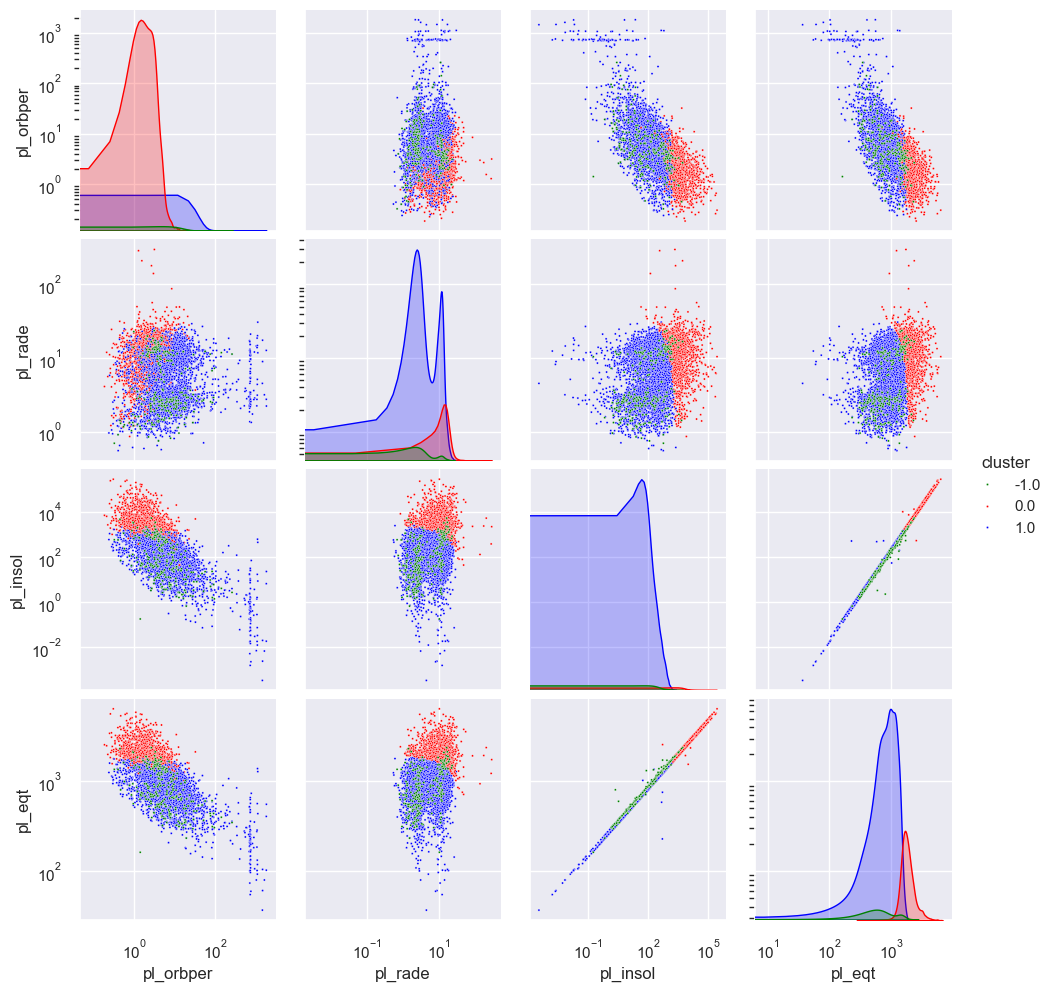

In [683]:


# Supondo que df_tess_ml e df_tess_confirmed já estejam definidos e pré-processados
columns_to_use = [
    'pl_orbper',      # Período Orbital do Planeta [dias]
    'pl_rade',        # Raio do Planeta [R_Terra]
    'pl_insol',       # Insolação do Planeta [fluxo da Terra]
    'pl_eqt',         # Temperatura de Equilíbrio do Planeta [K]
]

# Concatenar os dados
df_tess_ml = df_filter_tess_2[columns_to_use].dropna()
df_tess_ml['soltype'] = np.nan
df_tess_confirmed2 = df_tess_confirmed[columns_to_use + ['soltype']].dropna()
df_combined = pd.concat([df_tess_ml, df_tess_confirmed2], ignore_index=True)

# Adicionar rótulos reais aos dados combinados
df_combined['is_exoplanet'] = df_combined['soltype'].apply(lambda x: 1 if x == 'Published Confirmed' else 0)
print(df_combined['is_exoplanet'].value_counts())

# Escalar as características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_combined[columns_to_use])

# Aplicar K-Means clustering apenas nas linhas que têm soltype como NaN (dados de df_tess_ml)
kmeans = KMeans(n_clusters=2, random_state=42)
df_combined.loc[df_combined['soltype'].isna(), 'cluster'] = kmeans.fit_predict(X_scaled[df_combined['soltype'].isna()])

# Adicionar os clusters ao df_tess_ml e df_tess_confirmed
df_tess_ml['cluster'] = df_combined.loc[df_combined['soltype'].isna(), 'cluster'].values
df_tess_confirmed2['cluster'] = -1  # Usar um valor distinto para os confirmados

# Concatenar novamente para visualização
df_visualization = pd.concat([df_tess_ml, df_tess_confirmed2], ignore_index=True)

# Garantir que a coluna 'is_exoplanet' esteja presente no DataFrame de visualização
df_visualization['is_exoplanet'] = df_combined['is_exoplanet']
print(df_visualization['cluster'].value_counts())

# Configurar os marcadores para os clusters
markers = { -1: '.', 0: '.', 1: '.' }

# Criar um pairplot para mostrar todos os gráficos juntos
g = sns.pairplot(
    df_visualization,
    vars=columns_to_use,
    hue='cluster',
    palette={-1: 'green', 0: 'red', 1: 'blue'},
    markers=[markers[cluster] for cluster in df_visualization['cluster'].unique()],
    plot_kws={'s': 10}
)

# Alterar a escala dos eixos para log
for ax in g.axes.flatten():
    ax.set_xscale('log')
    ax.set_yscale('log')

# Updating the legend labels for the pairplot
new_labels = {-1.0: 'Confirmed', 0.0: 'Cluster A', 1.0: 'Cluster B'}

# Retrieve current legend handles and labels
#handles, labels = g._legend.legendHandles, [new_labels[float(label.get_text())] for label in g._legend.texts]

# Remove the old legend

# Add a new legend with updated labels
plt.legend()

plt.show()


old

In [684]:

# Calcular a média das características para cada cluster
mean_cluster_minus_1 = df_visualization[df_visualization['cluster'] == -1][columns_to_use].mean()
mean_cluster_0 = df_visualization[df_visualization['cluster'] == 0][columns_to_use].mean()
mean_cluster_1 = df_visualization[df_visualization['cluster'] == 1][columns_to_use].mean()

# Calcular a distância euclidiana entre a média do cluster -1 e as médias dos clusters 0 e 1
distance_to_cluster_0 = euclidean(mean_cluster_minus_1, mean_cluster_0)
distance_to_cluster_1 = euclidean(mean_cluster_minus_1, mean_cluster_1)

# Determinar qual cluster está mais próximo do cluster -1
closest_cluster = 0 if distance_to_cluster_0 < distance_to_cluster_1 else 1

print(f"Cluster mais próximo do cluster -1: {closest_cluster}")
print(f"Distância para cluster 0: {distance_to_cluster_0}")
print(f"Distância para cluster 1: {distance_to_cluster_1}")

Cluster mais próximo do cluster -1: 1
Distância para cluster 0: 6333.2880499353
Distância para cluster 1: 99.75120640277268


## 6 - Kepler 

### 6.1. Data Cleaning

In [685]:
file_kepler = 'kepler.csv'
df_kepler = pd.read_csv(file_kepler)

df_kepler

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_time0,koi_time0_err1,koi_time0_err2,koi_eccen,koi_eccen_err1,koi_eccen_err2,koi_longp,koi_longp_err1,koi_longp_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_ingress,koi_ingress_err1,koi_ingress_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_ror,koi_ror_err1,koi_ror_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_fittype,koi_prad,koi_prad_err1,koi_prad_err2,koi_sma,koi_sma_err1,koi_sma_err2,koi_incl,koi_incl_err1,koi_incl_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_dor,koi_dor_err1,koi_dor_err2,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_sage,koi_sage_err1,koi_sage_err2,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sra_err,koi_fwm_sdec,koi_fwm_sdec_err,koi_fwm_srao,koi_fwm_srao_err,koi_fwm_sdeco,koi_fwm_sdeco_err,koi_fwm_prao,koi_fwm_prao_err,koi_fwm_pdeco,koi_fwm_pdeco_err,koi_dicco_mra,koi_dicco_mra_err,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,2455003.539,0.002160,-0.002160,0.0,NaN,NaN,NaN,NaN,NaN,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,NaN,NaN,NaN,615.8,19.5,-19.5,0.022344,0.000832,-0.000528,3.20796,0.33173,-1.09986,LS+MCMC,2.26,0.26,-0.15,0.0853,NaN,NaN,89.66,NaN,NaN,793.0,NaN,NaN,93.59,29.45,-16.65,24.810,2.600,-2.600,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,1.400000e-05,48.141910,0.000130,0.430,0.510,0.940,0.480,-0.000200,0.000320,-0.000550,0.000310,-0.010,0.130,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,2454995.514,0.003520,-0.003520,0.0,NaN,NaN,NaN,NaN,NaN,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,NaN,NaN,NaN,874.8,35.5,-35.5,0.027954,0.009078,-0.001347,3.02368,2.20489,-2.49638,LS+MCMC,2.83,0.32,-0.19,0.2734,NaN,NaN,89.57,NaN,NaN,443.0,NaN,NaN,9.11,2.87,-1.62,77.900,28.400,-28.400,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.

In [686]:
# List of columns from the DataFrame
column_names = [
    'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_vet_stat', 
    'koi_vet_date', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 
    'koi_fpflag_co', 'koi_fpflag_ec', 'koi_disp_prov', 'koi_comment', 'koi_period', 
    'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 
    'koi_time0bk_err2', 'koi_time0', 'koi_time0_err1', 'koi_time0_err2', 'koi_eccen', 
    'koi_eccen_err1', 'koi_eccen_err2', 'koi_longp', 'koi_longp_err1', 'koi_longp_err2', 
    'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 
    'koi_duration_err1', 'koi_duration_err2', 'koi_ingress', 'koi_ingress_err1', 
    'koi_ingress_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_ror', 
    'koi_ror_err1', 'koi_ror_err2', 'koi_srho', 'koi_srho_err1', 'koi_srho_err2', 
    'koi_fittype', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_sma', 
    'koi_sma_err1', 'koi_sma_err2', 'koi_incl', 'koi_incl_err1', 'koi_incl_err2', 
    'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 
    'koi_insol_err2', 'koi_dor', 'koi_dor_err1', 'koi_dor_err2', 'koi_limbdark_mod', 
    'koi_ldm_coeff4', 'koi_ldm_coeff3', 'koi_ldm_coeff2', 'koi_ldm_coeff1', 
    'koi_parm_prov', 'koi_max_sngle_ev', 'koi_max_mult_ev', 'koi_model_snr', 
    'koi_count', 'koi_num_transits', 'koi_tce_plnt_num', 'koi_tce_delivname', 
    'koi_quarters', 'koi_bin_oedp_sig', 'koi_trans_mod', 'koi_model_dof', 
    'koi_model_chisq', 'koi_datalink_dvr', 'koi_datalink_dvs', 'koi_steff', 
    'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 
    'koi_smet', 'koi_smet_err1', 'koi_smet_err2', 'koi_srad', 'koi_srad_err1', 
    'koi_srad_err2', 'koi_smass', 'koi_smass_err1', 'koi_smass_err2', 'koi_sage', 
    'koi_sage_err1', 'koi_sage_err2', 'koi_sparprov', 'ra', 'dec', 'koi_kepmag', 
    'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 
    'koi_kmag', 'koi_fwm_stat_sig', 'koi_fwm_sra', 'koi_fwm_sra_err', 'koi_fwm_sdec', 
    'koi_fwm_sdec_err', 'koi_fwm_srao', 'koi_fwm_srao_err', 'koi_fwm_sdeco', 
    'koi_fwm_sdeco_err', 'koi_fwm_prao', 'koi_fwm_prao_err', 'koi_fwm_pdeco', 
    'koi_fwm_pdeco_err', 'koi_dicco_mra', 'koi_dicco_mra_err', 'koi_dicco_mdec', 
    'koi_dicco_mdec_err', 'koi_dicco_msky', 'koi_dicco_msky_err', 'koi_dikco_mra', 
    'koi_dikco_mra_err', 'koi_dikco_mdec', 'koi_dikco_mdec_err', 'koi_dikco_msky', 
    'koi_dikco_msky_err'
]


# Get the list of existing columns in the DataFrame
existing_columns = df_kepler.columns.tolist()

# Filter columns that end with 'err', 'err1', 'err2', or 'lim'
columns_to_drop = [col for col in columns if col.endswith(('err', 'err1', 'err2', 'lim'))]
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop the columns
df_filtered_kepler = df_kepler.drop(columns=columns_to_drop)

df_filtered_kepler

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_time0,koi_time0_err1,koi_time0_err2,koi_eccen,koi_eccen_err1,koi_eccen_err2,koi_longp,koi_longp_err1,koi_longp_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_ingress,koi_ingress_err1,koi_ingress_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_ror,koi_ror_err1,koi_ror_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_fittype,koi_prad,koi_prad_err1,koi_prad_err2,koi_sma,koi_sma_err1,koi_sma_err2,koi_incl,koi_incl_err1,koi_incl_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_dor,koi_dor_err1,koi_dor_err2,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_sage,koi_sage_err1,koi_sage_err2,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sra_err,koi_fwm_sdec,koi_fwm_sdec_err,koi_fwm_srao,koi_fwm_srao_err,koi_fwm_sdeco,koi_fwm_sdeco_err,koi_fwm_prao,koi_fwm_prao_err,koi_fwm_pdeco,koi_fwm_pdeco_err,koi_dicco_mra,koi_dicco_mra_err,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,2455003.539,0.002160,-0.002160,0.0,NaN,NaN,NaN,NaN,NaN,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,NaN,NaN,NaN,615.8,19.5,-19.5,0.022344,0.000832,-0.000528,3.20796,0.33173,-1.09986,LS+MCMC,2.26,0.26,-0.15,0.0853,NaN,NaN,89.66,NaN,NaN,793.0,NaN,NaN,93.59,29.45,-16.65,24.810,2.600,-2.600,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,1.400000e-05,48.141910,0.000130,0.430,0.510,0.940,0.480,-0.000200,0.000320,-0.000550,0.000310,-0.010,0.130,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,2454995.514,0.003520,-0.003520,0.0,NaN,NaN,NaN,NaN,NaN,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,NaN,NaN,NaN,874.8,35.5,-35.5,0.027954,0.009078,-0.001347,3.02368,2.20489,-2.49638,LS+MCMC,2.83,0.32,-0.19,0.2734,NaN,NaN,89.57,NaN,NaN,443.0,NaN,NaN,9.11,2.87,-1.62,77.900,28.400,-28.400,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.

In [687]:
df_kepler_explore = df_filtered_kepler[[
    "koi_period", "koi_time0", "koi_duration", "koi_ror", "koi_impact", "koi_eccen",
    "koi_prad", "koi_teq", "koi_insol", "koi_dor", 'koi_disposition']]



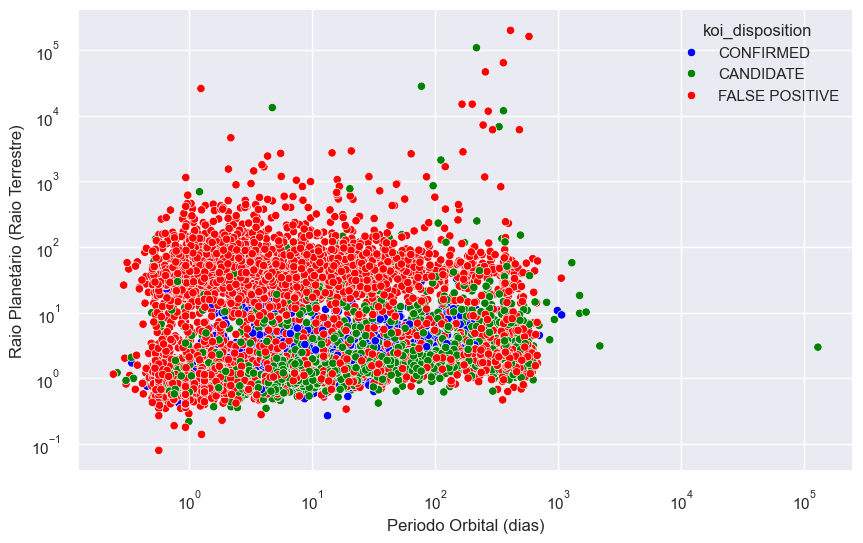

In [688]:

# Configurar o estilo do seaborn
sns.set(style="darkgrid")

# Colunas para plotar
y_col = "koi_prad"
x_col = "koi_period"

# Criar o gráfico 2D
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    data=df_kepler_explore,
    x=x_col,
    y=y_col,
    hue='koi_disposition',
    palette={'CONFIRMED': 'blue', 'CANDIDATE': 'green', 'FALSE POSITIVE': 'red'}
)
plt.ylabel('Raio Planetário (Raio Terrestre)')
plt.xlabel('Periodo Orbital (dias)')

# Definir escala logarítmica para os eixos, se necessário
log_x = True  # Defina como True se quiser escala logarítmica no eixo x
log_y = True  # Defina como True se quiser escala logarítmica no eixo y

if log_x:
    ax.set_xscale('log')
if log_y:
    ax.set_yscale('log')

plt.show()

### 6.2 - Random Forest Classifier

This uses koi_distribution ( data observed with kepler and other telescopes) which values are either confirmed or false positive to train the model. It compares the prediction to the actual values from koi_distribution.

To sum up, this tests the model with exoplanets that are already classified.

In [689]:
# Assuming df_filtered_kepler2 is already defined and preprocessed
# Select relevant columns
columns = [
    "koi_period", "koi_time0", "koi_duration", "koi_ror", "koi_impact", "koi_eccen",
    "koi_prad", "koi_teq", "koi_insol", "koi_dor"
]

# Filter the DataFrame to include only the relevant columns and drop rows with missing values
df_filtered_kepler2 = df_filtered_kepler[columns + ['koi_disposition', 'koi_pdisposition']].dropna()

# Filter for training data where koi_disposition is either CONFIRMED or FALSE POSITIVE
df_train = df_filtered_kepler2[df_filtered_kepler2['koi_disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])]
print(df_train['koi_disposition'].value_counts())
# Encode the target variable
label_encoder = LabelEncoder()
df_train['koi_disposition'] = label_encoder.fit_transform(df_train['koi_disposition'])

# Separate features and target for training
X_train = df_train[columns]
y_train = df_train['koi_disposition']

# Check class balance
print("Class distribution in training data:")
print(df_train['koi_disposition'].value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestClassifier with default parameters
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


koi_disposition
FALSE POSITIVE    4582
CONFIRMED         2741
Name: count, dtype: int64
Class distribution in training data:
koi_disposition
1    4582
0    2741
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\4176991265.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['koi_disposition'] = label_encoder.fit_transform(df_train['koi_disposition'])


Confusion Matrix:
[[491  57]
 [ 73 844]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       548
           1       0.94      0.92      0.93       917

    accuracy                           0.91      1465
   macro avg       0.90      0.91      0.91      1465
weighted avg       0.91      0.91      0.91      1465



this part is using the model to predict the results of not yet solved candidates

In [690]:
# Filter the DataFrame for CANDIDATE entries
df_candidates = df_filtered_kepler2[df_filtered_kepler2['koi_disposition'] == 'CANDIDATE']

# Separate features for candidates
X_candidates = df_candidates[columns]

# Scale the candidate data using the previously fitted scaler
X_candidates_scaled = scaler.transform(X_candidates)

# Make predictions on candidate data
y_candidates_pred = model.predict(X_candidates_scaled)

# Map predictions back to original labels
y_candidates_pred_labels = label_encoder.inverse_transform(y_candidates_pred)

# Display predictions for candidates
df_candidates['Predicted_Disposition'] = y_candidates_pred_labels
print(df_candidates[['koi_disposition', 'Predicted_Disposition']])
print(df_candidates['Predicted_Disposition'].value_counts())


     koi_disposition Predicted_Disposition
2          CANDIDATE        FALSE POSITIVE
58         CANDIDATE             CONFIRMED
62         CANDIDATE             CONFIRMED
63         CANDIDATE        FALSE POSITIVE
84         CANDIDATE        FALSE POSITIVE
...              ...                   ...
9538       CANDIDATE             CONFIRMED
9542       CANDIDATE        FALSE POSITIVE
9552       CANDIDATE        FALSE POSITIVE
9560       CANDIDATE        FALSE POSITIVE
9562       CANDIDATE        FALSE POSITIVE

[1878 rows x 2 columns]
Predicted_Disposition
FALSE POSITIVE    972
CONFIRMED         906
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\4080153156.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_candidates['Predicted_Disposition'] = y_candidates_pred_labels


On the other hand, this uses the model from the last part and ALSO uses koi_pdistribution ( data observed only with kepler telescopes) where values are 'candidate' to see how the model classifies the candidates. Then discard candidates that are not yet solved (data with candidate values in both koi_distribution and koi_pdistribution). 

To sum up, this tests the model with exoplanets that were candidates, and later were resolved as confirmed or false positives.

The issue with this, is that there is no candidate that was later changed to false positive (eg 0 in the confusion matrix).

### 6.3 - KNN

In [691]:

# Supondo que df_filtered_kepler2 já esteja definido e pré-processado
# Selecionar colunas relevantes
columns = [
    "koi_period", "koi_time0", "koi_duration", "koi_ror", "koi_impact", "koi_eccen",
    "koi_prad", "koi_teq", "koi_insol", "koi_dor"
]

# Filtrar o DataFrame para incluir apenas as colunas relevantes e remover linhas com valores ausentes
df_filtered_kepler2 = df_filtered_kepler[columns + ['koi_disposition', 'koi_pdisposition']].dropna()

# Filtrar dados de treinamento onde koi_disposition é CONFIRMED ou FALSE POSITIVE
df_train = df_filtered_kepler2[df_filtered_kepler2['koi_disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])]
print(df_train['koi_disposition'].value_counts())

# Codificar a variável alvo
label_encoder = LabelEncoder()
df_train['koi_disposition'] = label_encoder.fit_transform(df_train['koi_disposition'])

# Separar características e alvo para treinamento
X_train = df_train[columns]
y_train = df_train['koi_disposition']

# Verificar balanceamento de classes
print("Distribuição das classes nos dados de treinamento:")
print(df_train['koi_disposition'].value_counts())

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Escalar as características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar um KNeighborsClassifier com parâmetros padrão
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_knn = knn_model.predict(X_test_scaled)

# Avaliar o modelo KNN
print("KNN - Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nKNN - Relatório de Classificação:")
print(classification_report(y_test, y_pred_knn))
df_filtered_kepler2

koi_disposition
FALSE POSITIVE    4582
CONFIRMED         2741
Name: count, dtype: int64
Distribuição das classes nos dados de treinamento:
koi_disposition
1    4582
0    2741
Name: count, dtype: int64
KNN - Matriz de Confusão:
[[448 100]
 [144 773]]

KNN - Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       548
           1       0.89      0.84      0.86       917

    accuracy                           0.83      1465
   macro avg       0.82      0.83      0.82      1465
weighted avg       0.84      0.83      0.83      1465



C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\2924653558.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['koi_disposition'] = label_encoder.fit_transform(df_train['koi_disposition'])


,koi_period,koi_time0,koi_duration,koi_ror,koi_impact,koi_eccen,koi_prad,koi_teq,koi_insol,koi_dor,koi_disposition,koi_pdisposition
0,9.488036,2455003.539,2.95750,0.022344,0.146,0.0,2.26,793.0,93.59,24.810,CONFIRMED,CANDIDATE
1,54.418383,2454995.514,4.50700,0.027954,0.586,0.0,2.83,443.0,9.11,77.900,CONFIRMED,CANDIDATE
2,19.899140,2455008.850,1.78220,0.154046,0.969,0.0,14.60,638.0,39.30,53.500,CANDIDATE,CANDIDATE
3,1.736952,2455003.308,2.40641,0.387394,1.276,0.0,33.46,1395.0,891.96,3.278,FALSE POSITIVE,FALSE POSITIVE
4,2.525592,2455004.596,1.65450,0.024064,0.701,0.0,2.75,1406.0,926.16,8.750,CONFIRMED,CANDIDATE
...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0.527699,2454964.705,3.22210,0.297633,1.252,0.0,29.35,2088.0,4500.53,1.339,FALSE POSITIVE,FALSE POSITIVE
9560,1.739849,2454966.001,3.11400,0.006379,0.043,0.0,0.72,1608.0,1585.81,4.331,CANDIDATE,CANDIDATE
9561,0.681402,2454965.182,0.86500,0.009444,0.147,0.0,1.07,2218.0,5713.41,6.040,FALSE POSITIVE,FALSE POSITIVE
9562,333.486169,2454986.615,3.19900,0.022590,0.214,0.0,19.30,557.0,22.68,796.000,CANDIDATE,CANDIDATE


In [692]:
# Filter the DataFrame for CANDIDATE entries
df_candidates = df_filtered_kepler2[df_filtered_kepler2['koi_disposition'] == 'CANDIDATE']

# Separate features for candidates
X_candidates = df_candidates[columns]

# Scale the candidate data using the previously fitted scaler
X_candidates_scaled = scaler.transform(X_candidates)

# Make predictions on candidate data
y_candidates_pred = knn_model.predict(X_candidates_scaled)

# Map predictions back to original labels
y_candidates_pred_labels = label_encoder.inverse_transform(y_candidates_pred)

# Display predictions for candidates
df_candidates['Predicted_Disposition'] = y_candidates_pred_labels
print(df_candidates[['koi_disposition', 'Predicted_Disposition']])
print(df_candidates['Predicted_Disposition'].value_counts())


     koi_disposition Predicted_Disposition
2          CANDIDATE        FALSE POSITIVE
58         CANDIDATE             CONFIRMED
62         CANDIDATE             CONFIRMED
63         CANDIDATE             CONFIRMED
84         CANDIDATE             CONFIRMED
...              ...                   ...
9538       CANDIDATE        FALSE POSITIVE
9542       CANDIDATE        FALSE POSITIVE
9552       CANDIDATE        FALSE POSITIVE
9560       CANDIDATE        FALSE POSITIVE
9562       CANDIDATE        FALSE POSITIVE

[1878 rows x 2 columns]
Predicted_Disposition
FALSE POSITIVE    952
CONFIRMED         926
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\4160656432.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_candidates['Predicted_Disposition'] = y_candidates_pred_labels


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\3044644536.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_candidates['Predicted_Disposition_KNN'] = y_candidates_pred_labels_knn
C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\3044644536.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_candidates['Predicted_Disposition_RF'] = y_candidates_pred_labels_rf
C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\3044644536.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

Porcentagem de concordância em CONFIRMED: 39.19% (736 casos)
Porcentagem de concordância em FALSE POSITIVE: 41.64% (782 casos)
Porcentagem de discordância: 19.17% (360 casos)


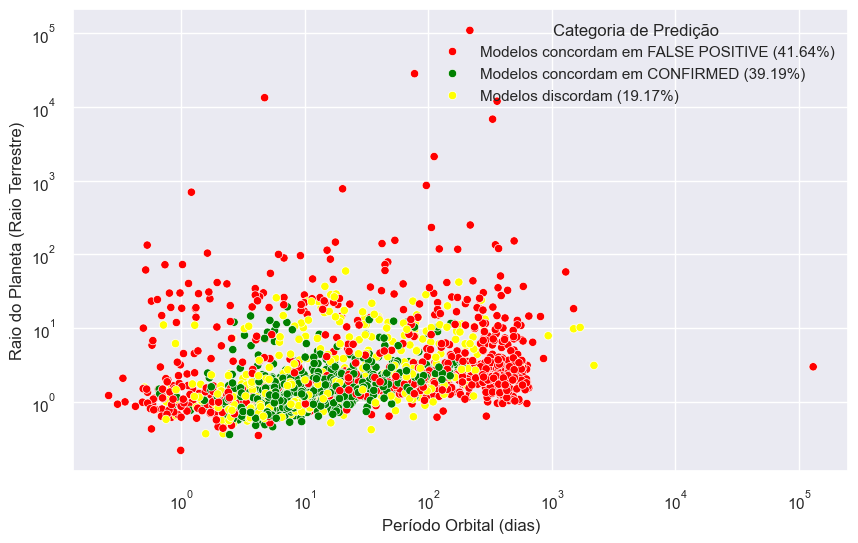

In [693]:
# Filtrar o DataFrame para entradas CANDIDATE
df_candidates = df_filtered_kepler2[df_filtered_kepler2['koi_disposition'] == 'CANDIDATE']

# Separar as features para os candidatos
X_candidates = df_candidates[columns]

# Escalar os dados dos candidatos usando o scaler previamente ajustado
X_candidates_scaled = scaler.transform(X_candidates)

# Fazer previsões nos dados dos candidatos com ambos os modelos
y_candidates_pred_knn = knn_model.predict(X_candidates_scaled)
y_candidates_pred_rf = model.predict(X_candidates_scaled)

# Mapear as previsões de volta para os rótulos originais
y_candidates_pred_labels_knn = label_encoder.inverse_transform(y_candidates_pred_knn)
y_candidates_pred_labels_rf = label_encoder.inverse_transform(y_candidates_pred_rf)

# Adicionar as previsões ao DataFrame
df_candidates['Predicted_Disposition_KNN'] = y_candidates_pred_labels_knn
df_candidates['Predicted_Disposition_RF'] = y_candidates_pred_labels_rf

# Categorizar os resultados conforme as regras fornecidas
def categorize_predictions(row):
    if row['Predicted_Disposition_KNN'] == 'FALSE POSITIVE' and row['Predicted_Disposition_RF'] == 'FALSE POSITIVE':
        return 'Modelos concordam em FALSE POSITIVE'
    elif row['Predicted_Disposition_KNN'] == 'CONFIRMED' and row['Predicted_Disposition_RF'] == 'CONFIRMED':
        return 'Modelos concordam em CONFIRMED'
    elif row['Predicted_Disposition_KNN'] != row['Predicted_Disposition_RF']:
        return 'Modelos discordam'


df_candidates['Prediction_Category'] = df_candidates.apply(categorize_predictions, axis=1)

# Calcular as quantidades e porcentagens de cada categoria
total = len(df_candidates)
count_concordam_confirmed = len(df_candidates[df_candidates['Prediction_Category'] == 'Modelos concordam em CONFIRMED'])
count_concordam_false_positive = len(df_candidates[df_candidates['Prediction_Category'] == 'Modelos concordam em FALSE POSITIVE'])
count_discordam = len(df_candidates[df_candidates['Prediction_Category'] == 'Modelos discordam'])

percent_concordam_confirmed = count_concordam_confirmed / total * 100
percent_concordam_false_positive = count_concordam_false_positive / total * 100
percent_discordam = count_discordam / total * 100

print(f"Porcentagem de concordância em CONFIRMED: {percent_concordam_confirmed:.2f}% ({count_concordam_confirmed} casos)")
print(f"Porcentagem de concordância em FALSE POSITIVE: {percent_concordam_false_positive:.2f}% ({count_concordam_false_positive} casos)")
print(f"Porcentagem de discordância: {percent_discordam:.2f}% ({count_discordam} casos)")

# Adicionar as porcentagens na legenda
legend_labels = {
    'Modelos concordam em FALSE POSITIVE': f'Modelos concordam em FALSE POSITIVE ({percent_concordam_false_positive:.2f}%)',
    'Modelos concordam em CONFIRMED': f'Modelos concordam em CONFIRMED ({percent_concordam_confirmed:.2f}%)',
    'Modelos discordam': f'Modelos discordam ({percent_discordam:.2f}%)',
    'other': 'other'
}

# Plotar os resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_candidates,
    x='koi_period',
    y='koi_prad',
    hue='Prediction_Category',
    palette={
        'Modelos concordam em FALSE POSITIVE': 'red',
        'Modelos concordam em CONFIRMED': 'green',
        'Modelos discordam': 'yellow',
        'other': 'gray'
    }
)

# Atualizar a legenda com as porcentagens
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels]
plt.legend(handles=handles, labels=new_labels, title='Categoria de Predição')

plt.xlabel('Período Orbital (dias)')
plt.ylabel('Raio do Planeta (Raio Terrestre)')
plt.xscale('log')  # Defina a escala logarítmica se necessário
plt.yscale('log')  # Defina a escala logarítmica se necessário
plt.show()

## 7 - K2

In [694]:
file_kepler = 'k2_candidates.csv'
df_k2 = pd.read_csv(file_kepler)



In [695]:


# Get the list of existing columns in the DataFrame
existing_columns = df_k2.columns.tolist()
print(existing_columns)
# Filter columns that end with 'err', 'err1', 'err2', or 'lim'
columns_to_drop = [col for col in existing_columns if col.endswith(('err', 'err1', 'err2', 'lim'))]


# Drop the columns
df_k2_filtered = df_k2.drop(columns=columns_to_drop)



['rowid', 'pl_name', 'hostname', 'pl_letter', 'k2_name', 'epic_hostname', 'epic_candname', 'hd_name', 'hip_name', 'tic_id', 'gaia_id', 'default_flag', 'disposition', 'disp_refname', 'sy_snum', 'sy_pnum', 'sy_mnum', 'cb_flag', 'discoverymethod', 'disc_year', 'disc_refname', 'disc_pubdate', 'disc_locale', 'disc_facility', 'disc_telescope', 'disc_instrument', 'rv_flag', 'pul_flag', 'ptv_flag', 'tran_flag', 'ast_flag', 'obm_flag', 'micro_flag', 'etv_flag', 'ima_flag', 'dkin_flag', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_masselim', 'pl_massj', 'pl_massjerr1', 'pl_massjerr2', 'pl_massjlim', 'pl_msinie', 'pl_msinieerr1', 'pl_msinieerr2', 'pl_msinielim', 'pl_msinij', 'pl_msinijerr1', 'pl_msinijerr2', 'pl_ms

In [696]:
# Obter a lista de colunas existentes no DataFrame
existing_columns = df_k2.columns.tolist()
print(existing_columns)

# Filtrar colunas que terminam com 'err', 'err1', 'err2' ou 'lim'
columns_to_drop = [col for col in existing_columns if col.endswith(('err', 'err1', 'err2', 'lim'))]

# Remover as colunas
df_k2_filtered = df_k2.drop(columns=columns_to_drop)



['rowid', 'pl_name', 'hostname', 'pl_letter', 'k2_name', 'epic_hostname', 'epic_candname', 'hd_name', 'hip_name', 'tic_id', 'gaia_id', 'default_flag', 'disposition', 'disp_refname', 'sy_snum', 'sy_pnum', 'sy_mnum', 'cb_flag', 'discoverymethod', 'disc_year', 'disc_refname', 'disc_pubdate', 'disc_locale', 'disc_facility', 'disc_telescope', 'disc_instrument', 'rv_flag', 'pul_flag', 'ptv_flag', 'tran_flag', 'ast_flag', 'obm_flag', 'micro_flag', 'etv_flag', 'ima_flag', 'dkin_flag', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_masselim', 'pl_massj', 'pl_massjerr1', 'pl_massjerr2', 'pl_massjlim', 'pl_msinie', 'pl_msinieerr1', 'pl_msinieerr2', 'pl_msinielim', 'pl_msinij', 'pl_msinijerr1', 'pl_msinijerr2', 'pl_ms

In [697]:
columns = [
    "pl_orbper",      # Orbital Period [days] - 40 missing
    "pl_rade",        # Planet Radius [Earth Radius] - 809 missing
    "pl_radj",        # Planet Radius [Jupiter Radius] - 809 missing
    "st_teff",        # Stellar Effective Temperature [K] - 1,108 missing
    "st_rad",         # Stellar Radius [Solar Radius] - 124 missing
    "sy_dist",        # Distance to System [pc] - 123 missing
    "sy_vmag"         # Visual Magnitude - 42 missing
]

# Filter the DataFrame to include only the relevant columns and drop rows with missing values
df_k2_explore = df_k2_filtered[columns + ['disposition']].dropna()


In [698]:


# Assuming df_filtered_kepler2 is already defined and preprocessed
# Select relevant columns
columns = [
    "pl_orbper",      # Orbital Period [days] - 40 missing
    "pl_rade",        # Planet Radius [Earth Radius] - 809 missing
    "pl_radj",        # Planet Radius [Jupiter Radius] - 809 missing
    "st_teff",        # Stellar Effective Temperature [K] - 1,108 missing
    "st_rad",         # Stellar Radius [Solar Radius] - 124 missing
    "sy_dist",        # Distance to System [pc] - 123 missing
    "sy_vmag"         # Visual Magnitude - 42 missing
]

# Filter the DataFrame to include only the relevant columns and drop rows with missing values
df_k2_filtered2 = df_k2_filtered[columns + ['disposition']].dropna()

# Filter for training data where koi_disposition is either CONFIRMED or FALSE POSITIVE
df_train = df_k2_filtered2[df_k2_filtered2['disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])]

# Encode the target variable
label_encoder = LabelEncoder()
df_train['disposition'] = label_encoder.fit_transform(df_train['disposition'])

# Separate features and target for training
X_train = df_train[columns]
y_train = df_train['disposition']

# Check class balance
print("Class distribution in training data:")
print(df_train['disposition'].value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestClassifier with default parameters
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Class distribution in training data:
disposition
0    1358
1      57
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\3274627782.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['disposition'] = label_encoder.fit_transform(df_train['disposition'])


Confusion Matrix:
[[271   1]
 [  2   9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       272
           1       0.90      0.82      0.86        11

    accuracy                           0.99       283
   macro avg       0.95      0.91      0.93       283
weighted avg       0.99      0.99      0.99       283



In [699]:
# Filter the DataFrame for CANDIDATE entries
df_candidates = df_k2_filtered2[df_k2_filtered2['disposition'] == 'CANDIDATE']

# Separate features for candidates
X_candidates = df_candidates[columns]

# Scale the candidate data using the previously fitted scaler
X_candidates_scaled = scaler.transform(X_candidates)

# Make predictions on candidate data
y_candidates_pred = model.predict(X_candidates_scaled)

# Map predictions back to original labels
y_candidates_pred_labels = label_encoder.inverse_transform(y_candidates_pred)

# Display predictions for candidates
df_candidates['Predicted_Disposition'] = y_candidates_pred_labels
print(df_candidates[['disposition', 'Predicted_Disposition']])
print(df_candidates['Predicted_Disposition'].value_counts())


     disposition Predicted_Disposition
3      CANDIDATE             CONFIRMED
4      CANDIDATE             CONFIRMED
5      CANDIDATE             CONFIRMED
6      CANDIDATE             CONFIRMED
7      CANDIDATE             CONFIRMED
...          ...                   ...
1756   CANDIDATE             CONFIRMED
1758   CANDIDATE             CONFIRMED
1777   CANDIDATE             CONFIRMED
1780   CANDIDATE        FALSE POSITIVE
1781   CANDIDATE             CONFIRMED

[519 rows x 2 columns]
Predicted_Disposition
CONFIRMED         445
FALSE POSITIVE     74
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\3875618250.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_candidates['Predicted_Disposition'] = y_candidates_pred_labels


### desbalanceamento

In [700]:


# Supondo que df_filtered_kepler2 já esteja definido e pré-processado
# Selecionar colunas relevantes
columns = [
    "pl_orbper",      # Período Orbital [dias] - 40 ausentes
    "pl_rade",        # Raio do Planeta [Raio da Terra] - 809 ausentes
    "pl_radj",        # Raio do Planeta [Raio de Júpiter] - 809 ausentes
    "st_teff",        # Temperatura Efetiva da Estrela [K] - 1.108 ausentes
    "st_rad",         # Raio da Estrela [Raio Solar] - 124 ausentes
    "sy_dist",        # Distância ao Sistema [pc] - 123 ausentes
    "sy_vmag"         # Magnitude Visual - 42 ausentes
]

# Filtrar o DataFrame para incluir apenas as colunas relevantes e remover linhas com valores ausentes
df_k2_filtered2 = df_k2_filtered[columns + ['disposition']].dropna()

# Filtrar dados de treinamento onde disposition é CONFIRMED ou FALSE POSITIVE
df_train = df_k2_filtered2[df_k2_filtered2['disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])]

# Codificar a variável alvo
label_encoder = LabelEncoder()
df_train['disposition'] = label_encoder.fit_transform(df_train['disposition'])

# Separar características e alvo para treinamento
X_train = df_train[columns]
y_train = df_train['disposition']

# Verificar o balanceamento das classes
print("Distribuição das classes nos dados de treinamento:")
print(df_train['disposition'].value_counts())

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled)

# Escalar as características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar um RandomForestClassifier com parâmetros padrão
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

# Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Distribuição das classes nos dados de treinamento:
disposition
0    1358
1      57
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\560381254.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['disposition'] = label_encoder.fit_transform(df_train['disposition'])


Matriz de Confusão:
[[266   6]
 [ 11 261]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       272
           1       0.98      0.96      0.97       272

    accuracy                           0.97       544
   macro avg       0.97      0.97      0.97       544
weighted avg       0.97      0.97      0.97       544



In [701]:
# Filter the DataFrame for CANDIDATE entries
df_candidates = df_k2_filtered2[df_k2_filtered2['disposition'] == 'CANDIDATE']

# Separate features for candidates
X_candidates = df_candidates[columns]

# Scale the candidate data using the previously fitted scaler
X_candidates_scaled = scaler.transform(X_candidates)

# Make predictions on candidate data
y_candidates_pred = model.predict(X_candidates_scaled)

# Map predictions back to original labels
y_candidates_pred_labels = label_encoder.inverse_transform(y_candidates_pred)

# Display predictions for candidates
df_candidates['Predicted_Disposition'] = y_candidates_pred_labels
print(df_candidates[['disposition', 'Predicted_Disposition']])
print(df_candidates['Predicted_Disposition'].value_counts())


     disposition Predicted_Disposition
3      CANDIDATE             CONFIRMED
4      CANDIDATE             CONFIRMED
5      CANDIDATE        FALSE POSITIVE
6      CANDIDATE             CONFIRMED
7      CANDIDATE             CONFIRMED
...          ...                   ...
1756   CANDIDATE        FALSE POSITIVE
1758   CANDIDATE             CONFIRMED
1777   CANDIDATE             CONFIRMED
1780   CANDIDATE        FALSE POSITIVE
1781   CANDIDATE             CONFIRMED

[519 rows x 2 columns]
Predicted_Disposition
CONFIRMED         368
FALSE POSITIVE    151
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\3875618250.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_candidates['Predicted_Disposition'] = y_candidates_pred_labels


In [702]:


# Supondo que df_filtered_kepler2 já esteja definido e pré-processado
# Selecionar colunas relevantes
columns = [
    "pl_orbper",      # Período Orbital [dias] - 40 ausentes
    "pl_rade",        # Raio do Planeta [Raio da Terra] - 809 ausentes
    "pl_radj",        # Raio do Planeta [Raio de Júpiter] - 809 ausentes
    "st_teff",        # Temperatura Efetiva da Estrela [K] - 1.108 ausentes
    "st_rad",         # Raio da Estrela [Raio Solar] - 124 ausentes
    "sy_dist",        # Distância ao Sistema [pc] - 123 ausentes
    "sy_vmag"         # Magnitude Visual - 42 ausentes
]

# Filtrar o DataFrame para incluir apenas as colunas relevantes e remover linhas com valores ausentes
df_k2_filtered2 = df_k2_filtered[columns + ['disposition']].dropna()

# Filtrar dados de treinamento onde disposition é CONFIRMED ou FALSE POSITIVE
df_train = df_k2_filtered2[df_k2_filtered2['disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])]

# Codificar a variável alvo
label_encoder = LabelEncoder()
df_train['disposition'] = label_encoder.fit_transform(df_train['disposition'])

# Separar características e alvo para treinamento
X_train = df_train[columns]
y_train = df_train['disposition']

# Verificar o balanceamento das classes
print("Distribuição das classes nos dados de treinamento:")
print(df_train['disposition'].value_counts())

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled)

# Escalar as características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Treinar um KNeighborsClassifier com parâmetros padrão
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_knn = knn_model.predict(X_test_scaled)

# Avaliar o modelo
print("Confusion Matrix (KNN):")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

Distribuição das classes nos dados de treinamento:
disposition
0    1358
1      57
Name: count, dtype: int64
Confusion Matrix (KNN):
[[252  20]
 [  8 264]]

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       272
           1       0.93      0.97      0.95       272

    accuracy                           0.95       544
   macro avg       0.95      0.95      0.95       544
weighted avg       0.95      0.95      0.95       544



C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\2894606360.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['disposition'] = label_encoder.fit_transform(df_train['disposition'])


In [703]:
# Filter the DataFrame for CANDIDATE entries
df_candidates = df_k2_filtered2[df_k2_filtered2['disposition'] == 'CANDIDATE']

# Separate features for candidates
X_candidates = df_candidates[columns]

# Scale the candidate data using the previously fitted scaler
X_candidates_scaled = scaler.transform(X_candidates)

# Make predictions on candidate data
y_candidates_pred = knn_model.predict(X_candidates_scaled)

# Map predictions back to original labels
y_candidates_pred_labels = label_encoder.inverse_transform(y_candidates_pred)

# Display predictions for candidates
df_candidates['Predicted_Disposition'] = y_candidates_pred_labels
print(df_candidates[['disposition', 'Predicted_Disposition']])
print(df_candidates['Predicted_Disposition'].value_counts())


     disposition Predicted_Disposition
3      CANDIDATE             CONFIRMED
4      CANDIDATE             CONFIRMED
5      CANDIDATE        FALSE POSITIVE
6      CANDIDATE             CONFIRMED
7      CANDIDATE        FALSE POSITIVE
...          ...                   ...
1756   CANDIDATE             CONFIRMED
1758   CANDIDATE             CONFIRMED
1777   CANDIDATE             CONFIRMED
1780   CANDIDATE        FALSE POSITIVE
1781   CANDIDATE             CONFIRMED

[519 rows x 2 columns]
Predicted_Disposition
CONFIRMED         349
FALSE POSITIVE    170
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\1373790128.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_candidates['Predicted_Disposition'] = y_candidates_pred_labels


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\1918434342.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_candidates['Predicted_Disposition_Model1'] = y_candidates_pred_labels_model1
C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\1918434342.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_candidates['Predicted_Disposition_Model2'] = y_candidates_pred_labels_model2
C:\Users\Usuario\AppData\Local\Temp\ipykernel_1596\1918434342.py:33: SettingWithCopyWarning: 
A value is trying to be set 

Porcentagem de concordância em CONFIRMED: 59.73% (310 casos)
Porcentagem de concordância em FALSE POSITIVE: 21.58% (112 casos)
Porcentagem de discordância: 18.69% (97 casos)


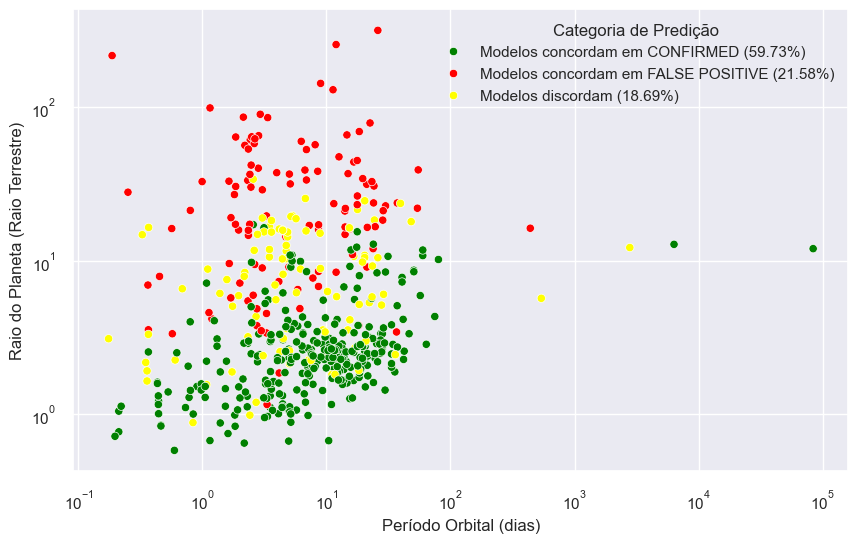

In [704]:
# Filtrar o DataFrame para entradas CANDIDATE
df_candidates = df_k2_filtered2[df_k2_filtered2['disposition'] == 'CANDIDATE']

# Separar as features para os candidatos
X_candidates = df_candidates[columns]

# Escalar os dados dos candidatos usando o scaler previamente ajustado
X_candidates_scaled = scaler.transform(X_candidates)

# Fazer previsões nos dados dos candidatos com ambos os modelos
y_candidates_pred_model1 = model.predict(X_candidates_scaled)
y_candidates_pred_model2 = knn_model.predict(X_candidates_scaled)

# Mapear as previsões de volta para os rótulos originais
y_candidates_pred_labels_model1 = label_encoder.inverse_transform(y_candidates_pred_model1)
y_candidates_pred_labels_model2 = label_encoder.inverse_transform(y_candidates_pred_model2)

# Adicionar as previsões ao DataFrame
df_candidates['Predicted_Disposition_Model1'] = y_candidates_pred_labels_model1
df_candidates['Predicted_Disposition_Model2'] = y_candidates_pred_labels_model2

# Categorizar os resultados conforme as regras fornecidas
def categorize_predictions(row):
    if row['Predicted_Disposition_Model1'] == 'FALSE POSITIVE' and row['Predicted_Disposition_Model2'] == 'FALSE POSITIVE':
        return 'Modelos concordam em FALSE POSITIVE'
    elif row['Predicted_Disposition_Model1'] == 'CONFIRMED' and row['Predicted_Disposition_Model2'] == 'CONFIRMED':
        return 'Modelos concordam em CONFIRMED'
    elif row['Predicted_Disposition_Model1'] != row['Predicted_Disposition_Model2']:
        return 'Modelos discordam'
    else:
        return 'other'

df_candidates['Prediction_Category'] = df_candidates.apply(categorize_predictions, axis=1)

# Calcular as quantidades e porcentagens de cada categoria
total = len(df_candidates)
count_concordam_confirmed = len(df_candidates[df_candidates['Prediction_Category'] == 'Modelos concordam em CONFIRMED'])
count_concordam_false_positive = len(df_candidates[df_candidates['Prediction_Category'] == 'Modelos concordam em FALSE POSITIVE'])
count_discordam = len(df_candidates[df_candidates['Prediction_Category'] == 'Modelos discordam'])

percent_concordam_confirmed = count_concordam_confirmed / total * 100
percent_concordam_false_positive = count_concordam_false_positive / total * 100
percent_discordam = count_discordam / total * 100

print(f"Porcentagem de concordância em CONFIRMED: {percent_concordam_confirmed:.2f}% ({count_concordam_confirmed} casos)")
print(f"Porcentagem de concordância em FALSE POSITIVE: {percent_concordam_false_positive:.2f}% ({count_concordam_false_positive} casos)")
print(f"Porcentagem de discordância: {percent_discordam:.2f}% ({count_discordam} casos)")

# Adicionar as porcentagens na legenda
legend_labels = {
    'Modelos concordam em FALSE POSITIVE': f'Modelos concordam em FALSE POSITIVE ({percent_concordam_false_positive:.2f}%)',
    'Modelos concordam em CONFIRMED': f'Modelos concordam em CONFIRMED ({percent_concordam_confirmed:.2f}%)',
    'Modelos discordam': f'Modelos discordam ({percent_discordam:.2f}%)',
    'other': 'other'
}

# Plotar os resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_candidates,
    x='pl_orbper',
    y='pl_rade',
    hue='Prediction_Category',
    palette={
        'Modelos concordam em FALSE POSITIVE': 'red',
        'Modelos concordam em CONFIRMED': 'green',
        'Modelos discordam': 'yellow',
        'other': 'gray'
    }
)

# Atualizar a legenda com as porcentagens
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels]
plt.legend(handles=handles, labels=new_labels, title='Categoria de Predição')

plt.xlabel('Período Orbital (dias)')
plt.ylabel('Raio do Planeta (Raio Terrestre)')
plt.xscale('log')  # Defina a escala logarítmica se necessário
plt.yscale('log')  # Defina a escala logarítmica se necessário
plt.show()